<a href="https://colab.research.google.com/github/Pauline-Zeestraten/E-portfolio-DSBA-program/blob/main/INNHotels_Supervised_Learning_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Import the dataset:
hotel = pd.read_csv('/content/drive/MyDrive/DSBA program/Supervised Learning - Decision Trees/INNHotelsGroup.csv')


In [ ]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
# View first five rows of dataset:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# View last five rows of dataset:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
# Understand the shape of dataset:
data.shape

(36275, 19)

There are 36,275 rows and 19 columns in this dataset.

In [ ]:
# Check the datatypes:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are no missing values, and there are five columns that are object or string datatype, indicating a categorical or boolean variable.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Checking for missing values:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Feature engineering - drop column 'Booking_ID' as it does not contribute to information:
data.drop(['Booking_ID'], axis = 1, inplace = True)

In [ ]:
# Correct spelling of 'Complementary' to 'Complimentary':
data['market_segment_type']=data['market_segment_type'].replace('Complementary', 'Complimentary')
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complimentary      391
Aviation           125
Name: count, dtype: int64

##Outlier Check:

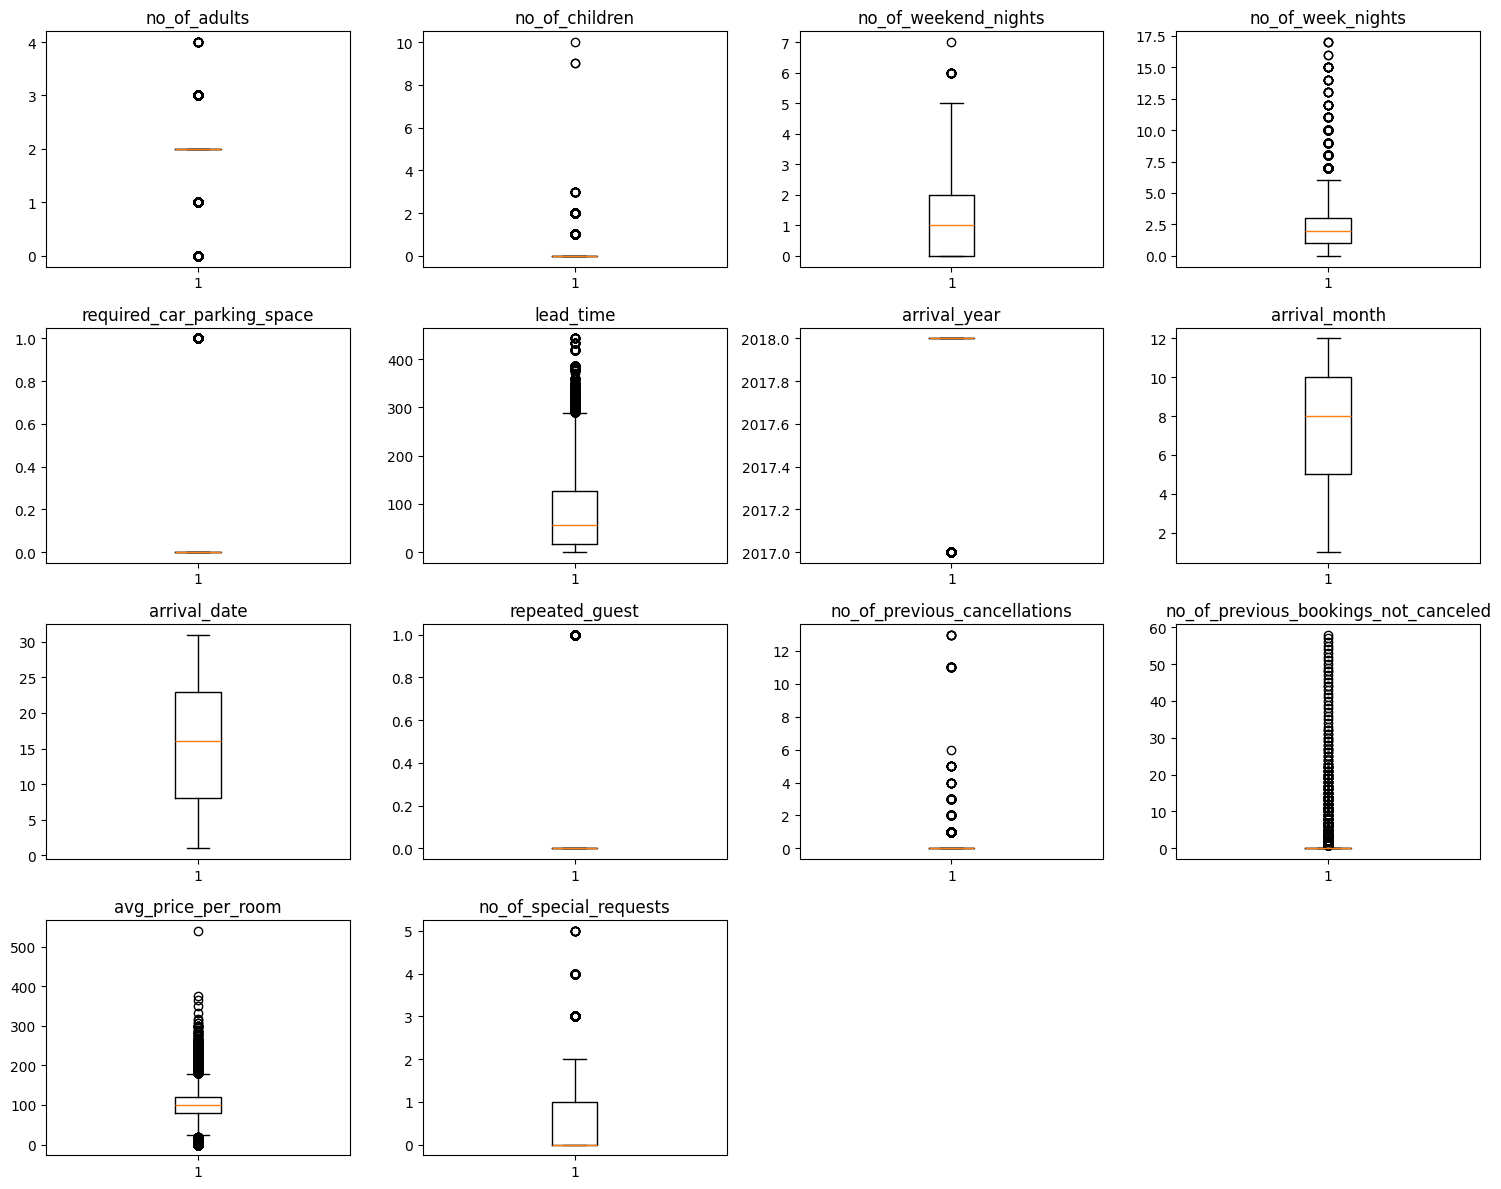

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Exploratory Data Analysis

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# Get statistical summary of the numerical columns:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10528               0.81072            2.20430   
std         0.51871         0.40265               0.87064            1.41090   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000        10.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.42354   
std                                 1.75417            35.08942   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           540.00000   

       no_of_special_requests  
count             36275.00000  
mean                  0.61966  
std                   0.78624  
min                   0.00000  
25%                   0.00000  
50%                   0.00000  
75%                   1.00000  
max                   5.00000

##Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 4), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    #creating the 2 subplots:
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##Observation on lead time:

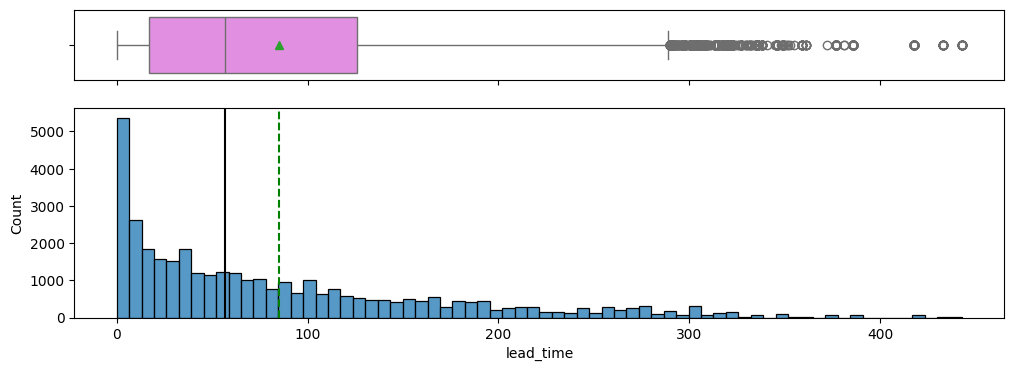

In [ ]:
# Create histogram boxplot on lead time:
histogram_boxplot (data, 'lead_time')


Observations on Lead Time:
Right skewed distribution with many outliers. Median at 57 days, Mean at 83 days.

##Observation on average price per room:

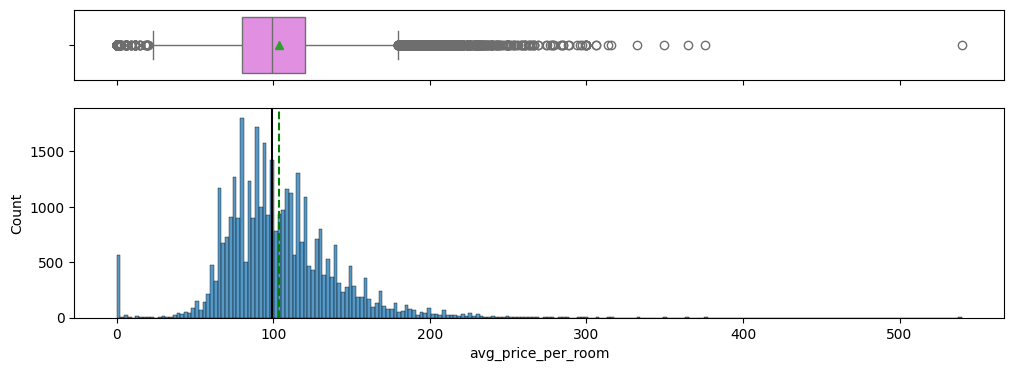

In [ ]:
# Create histogram boxplot on average price per room:
histogram_boxplot (data, 'avg_price_per_room')

Observation on Average Price Per Room:  

Right skewed distribution due to outliers including one higher than $500 range.

Distribution otherwise fairly normal distributed with mean and median at $100 and slightly above.

Unusual peak at $0 of more than 500 bookings.

##Address Outliers in Average Price Per Room:

In [ ]:
# Calculating the 25th percentile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th percentile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

np.float64(179.55)

In [ ]:
# Assigning the outliers the value of the Upper_Whisker
data.loc[data['avg_price_per_room']>=500, 'avg_price_per_room'] = Upper_Whisker

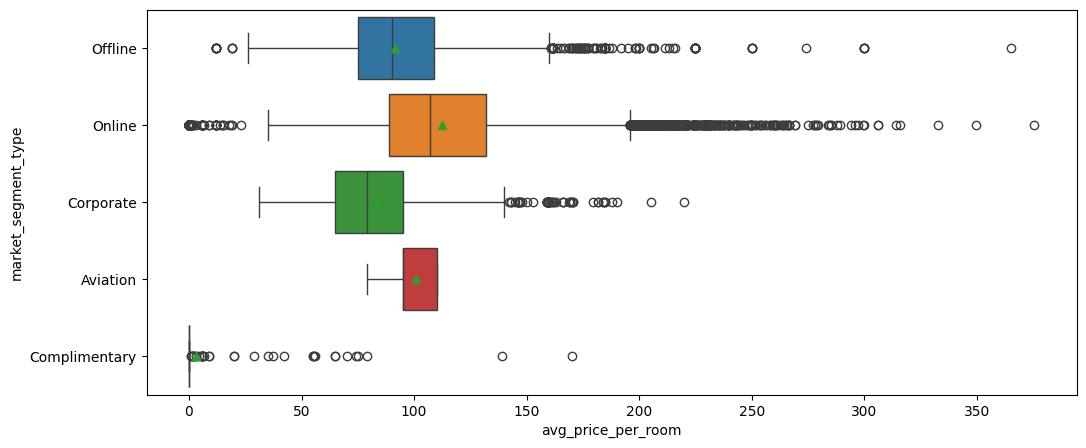

In [ ]:
# create a boxplot showing average price per room and market segment type:
plt.figure(figsize=(12,5))
sns.boxplot(data, x='avg_price_per_room', y='market_segment_type', showmeans = True, hue = 'market_segment_type')
plt.show()

In [ ]:
# Correct spelling of 'Complementary' to 'Complimentary':
data['market_segment_type']=data['market_segment_type'].replace('Complementary', 'Complimentary')

In [ ]:
# Check number of rooms with avg price of $0:
data[data['avg_price_per_room']==0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complimentary               0                             0   
145         Complimentary               1                             3   
209         Complimentary               0                             0   
266         Complimentary               1                             0   
267         Complimentary               0                             0   
...                   ...             ...                           ...   
35983       Complimentary               1                             4   
36080       Complimentary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

There are 545 rooms charged at $0.

In [ ]:
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complimentary      391
Aviation           125
Name: count, dtype: int64

Observation:  We see that 391 out of 545 rooms are complimentary rooms.  This leaves 154 rooms likely unintended to be left empty, bringing in no revenue.

##Observation on number of previous cancellations:

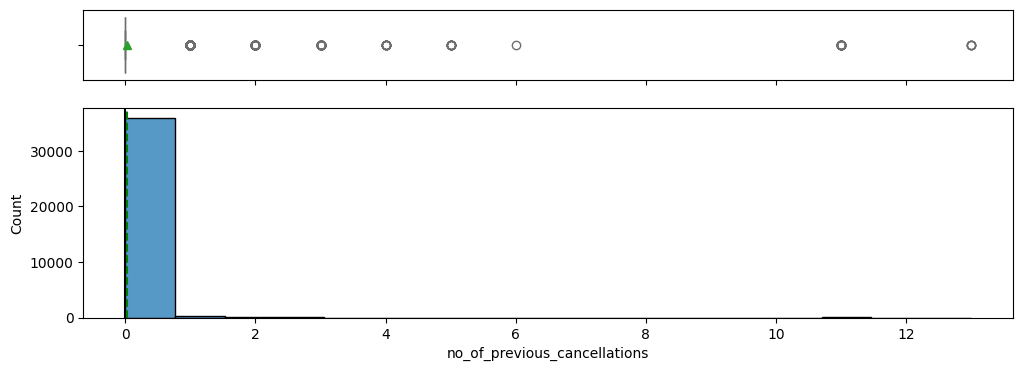

In [ ]:
# Create histogram boxplot on number of previous cancellations:
histogram_boxplot (data, 'no_of_previous_cancellations')
plt.show()

Observation: The number of customers who book with previous cancellations are neglible.

##Observation on number of previous bookings not cancelled:

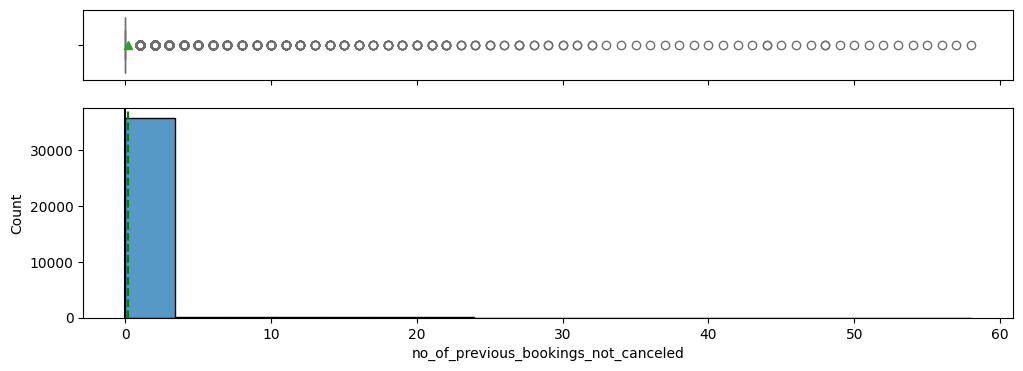

In [ ]:
# Create histogram boxplot of number of customers with previous bookings not cancelled:
histogram_boxplot (data, 'no_of_previous_bookings_not_canceled')
plt.show()

Observations:  Number of customers who book with bookings in the past not cancelled is also neglible.  This should be a growth opportunity, if they had a pleasant experience the first time.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    #length of the column
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##Observation on number of adults:

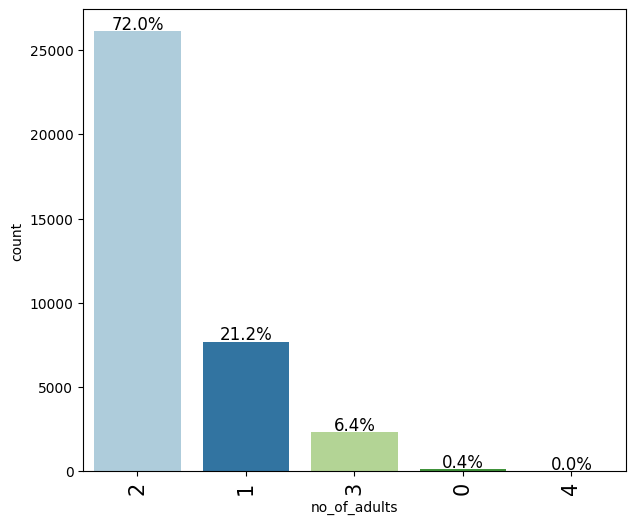

In [ ]:
# Create a labeled_barplot for number of adults:
labeled_barplot(data,'no_of_adults', perc=True)
#sns.countplot(data, x='no_of_adults')
plt.show()

Observation:  The majority of bookings are including two adults.

##Observation on number of children:

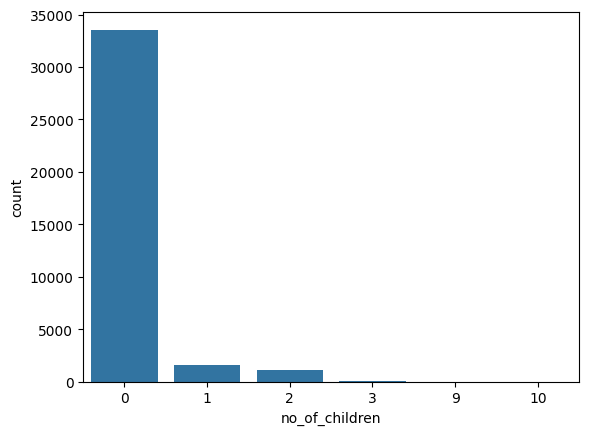

In [ ]:
# Create a countplot for number of children:
sns.countplot(data, x='no_of_children')
plt.show()

Observation:  The vast majority of bookings do not include children.  This is an opportunity for further growth.

##Observations on number of week nights:

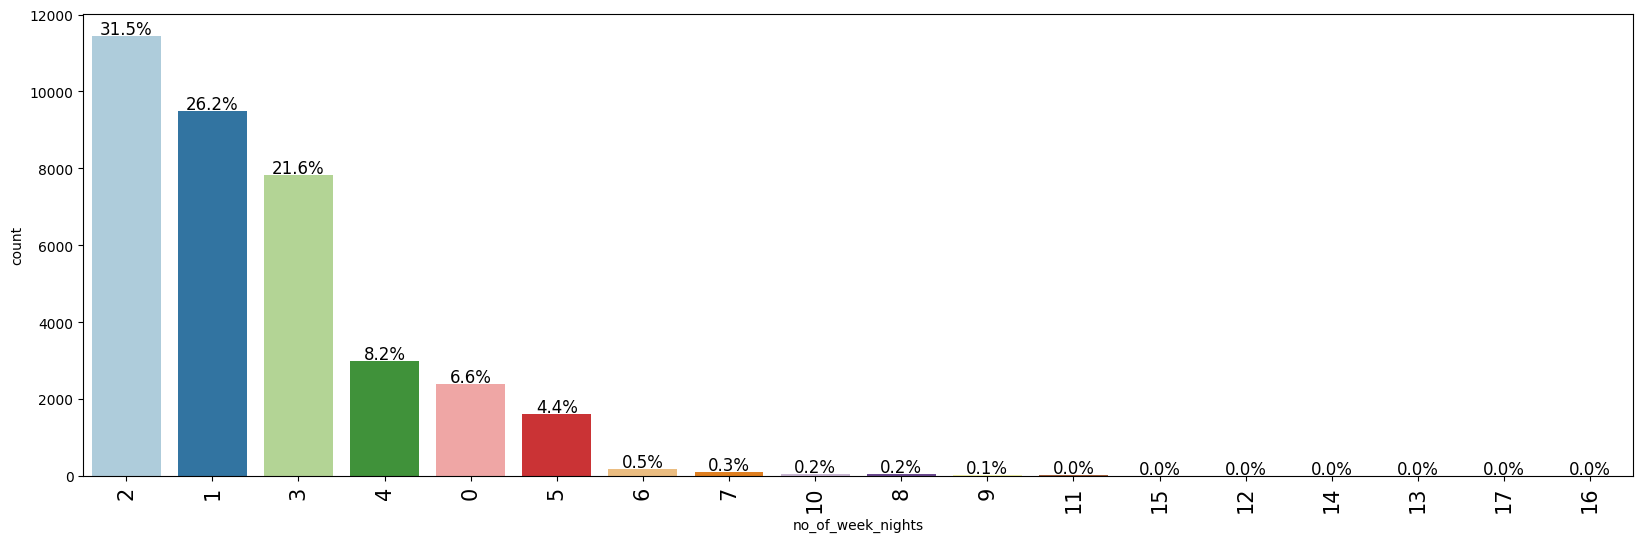

In [ ]:
# Create a labeled_barplot on number of weeknights:
labeled_barplot(data, 'no_of_week_nights', perc=True)
plt.show()

Observation: More than 50% of the bookings are for 1 and 2 nights.

##Observation on number of weekend nights:

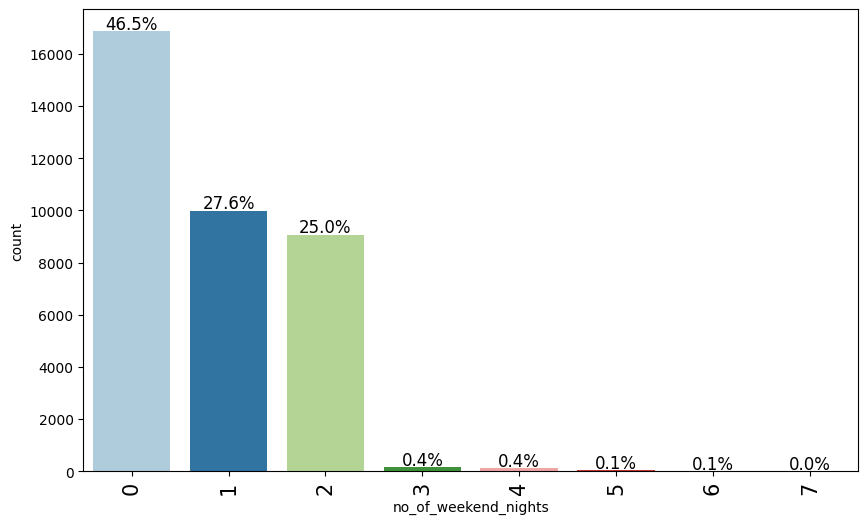

In [ ]:
# Create labeled barplot on number of weekend nights:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)
plt.show()

Observation: It looks like 46.5% of all bookings do not fall on a weekend day. Huge opportunity for growth.

##Observations on required parking space:

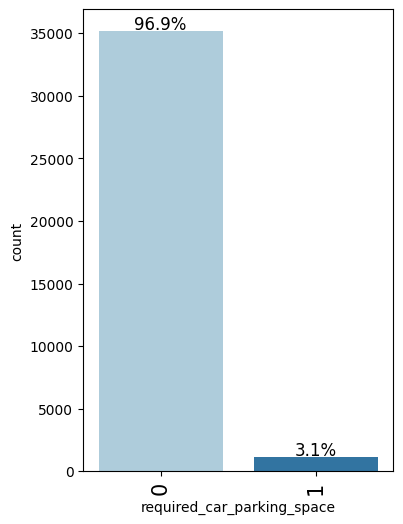

In [ ]:
# Create a labeled barplot on required parking space:
labeled_barplot(data, 'required_car_parking_space', perc=True)
plt.show()

Observation:  The vast majority of bookings does not need a car parking space.

##Observation on type of meal plan:

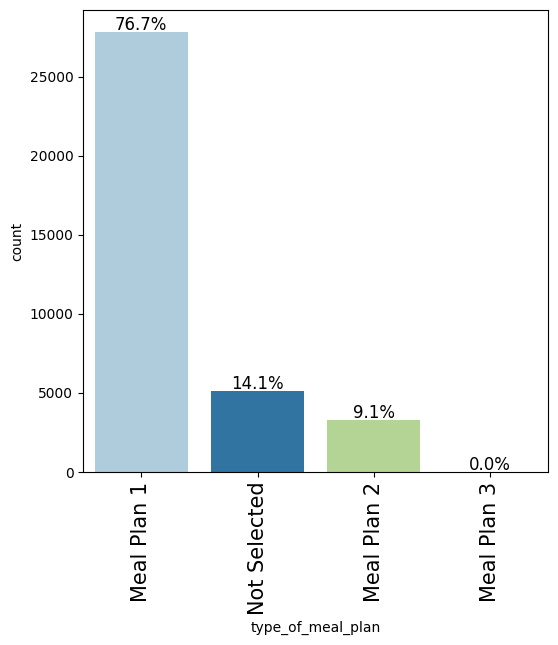

In [ ]:
# Create a labeled barplot to show the type of meal plan ordered:
labeled_barplot(data, 'type_of_meal_plan', perc=True)
plt.show()

Observation:  Meal Plan 1 is by far the favorite.

##Observation on room type reserved:

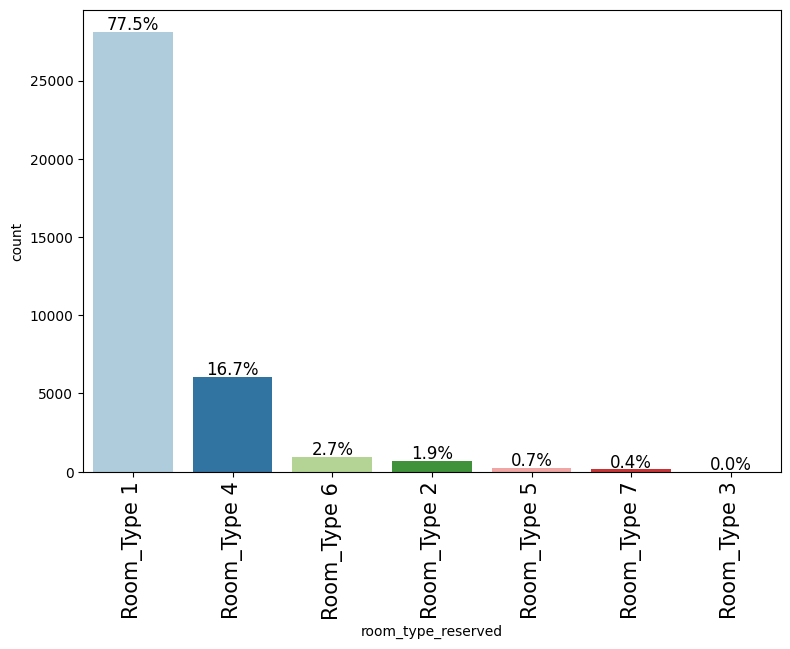

In [ ]:
# Create labeled barplot showing the various room types:
labeled_barplot(data, 'room_type_reserved', perc=True)
plt.show()

Observation:  Room type 1 is by far the most reserved with 77.5%

##Observations on Arrival Month:

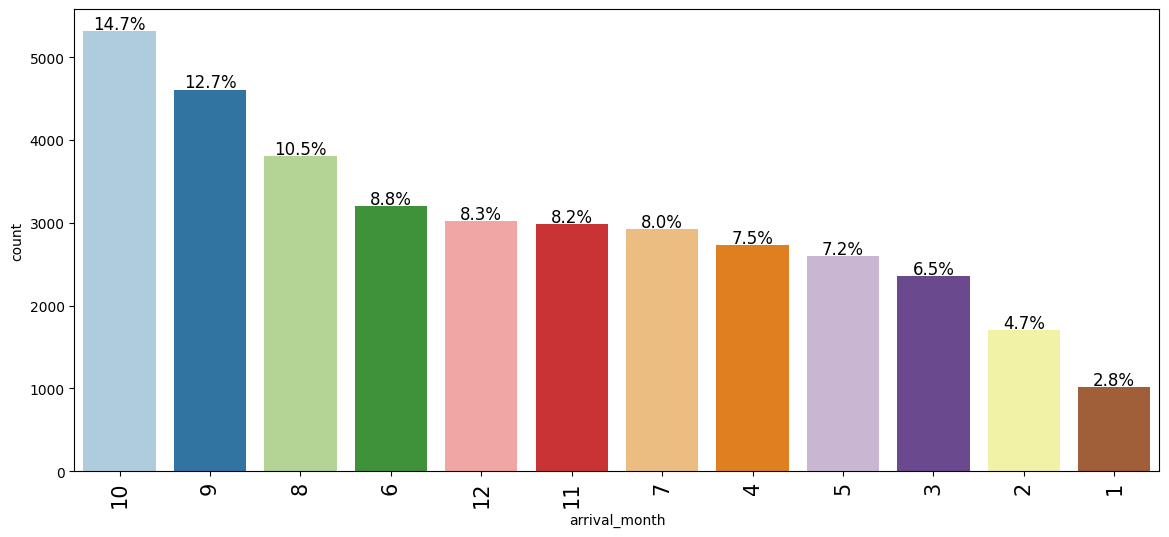

In [ ]:
# Create a labeled barplot showing the bookings per month of arrival:
labeled_barplot(data, 'arrival_month', perc=True)
plt.show()

Observation:  August (10.5%), September (12.7%),and October (14.7%) are the most popular months for arrival.  January the least with 2.8%

##Observations on Market Segment Type:

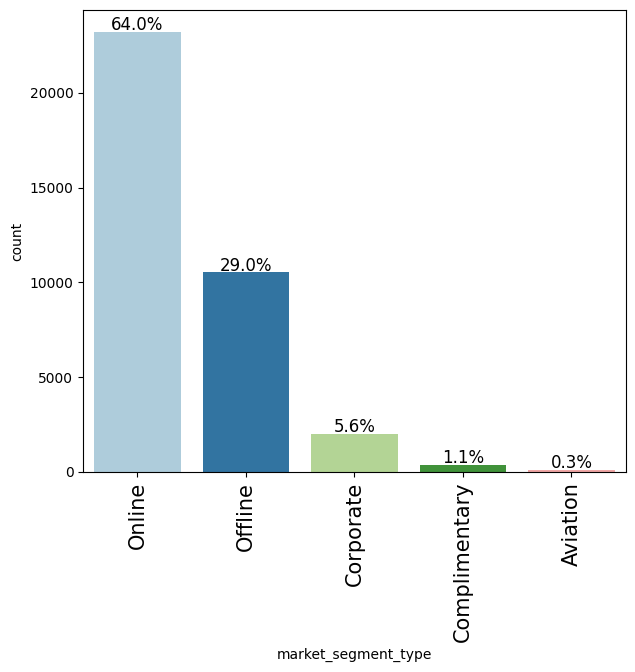

In [ ]:
# Create a labeled barplot on market segment type:
labeled_barplot(data, 'market_segment_type', perc=True)
plt.show()

Observation: Online reserved rooms are the most popular at 64%.

##Observation on number of special requests:

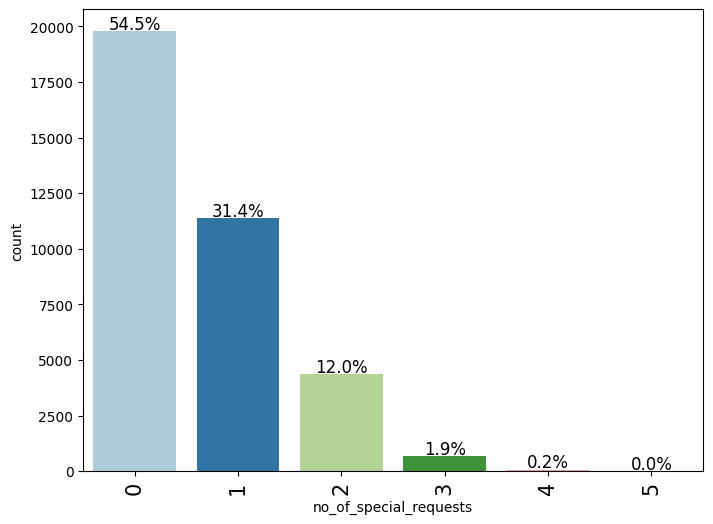

In [ ]:
# Create a labeled barplot on number of special requests:
labeled_barplot(data, 'no_of_special_requests', perc=True)
plt.show()

Observation: More than half of the reservations do not have a special request.

##Observation on booking status:

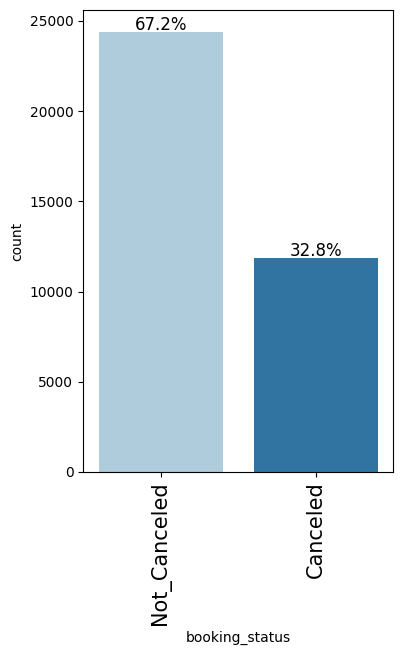

In [ ]:
# Create a labeled barplot on booking status:
labeled_barplot(data, 'booking_status', perc=True)
plt.show()

Observation:  Not an insignificant percentage of almost 33% of all bookings ends up being cancelled.

In [ ]:
# Let's convert booking status to integer datatype, so we can analyze this further:
data['booking_status'] = data['booking_status'].map ({'Canceled':1, 'Not_Canceled':0})


#Bivariate analysis:

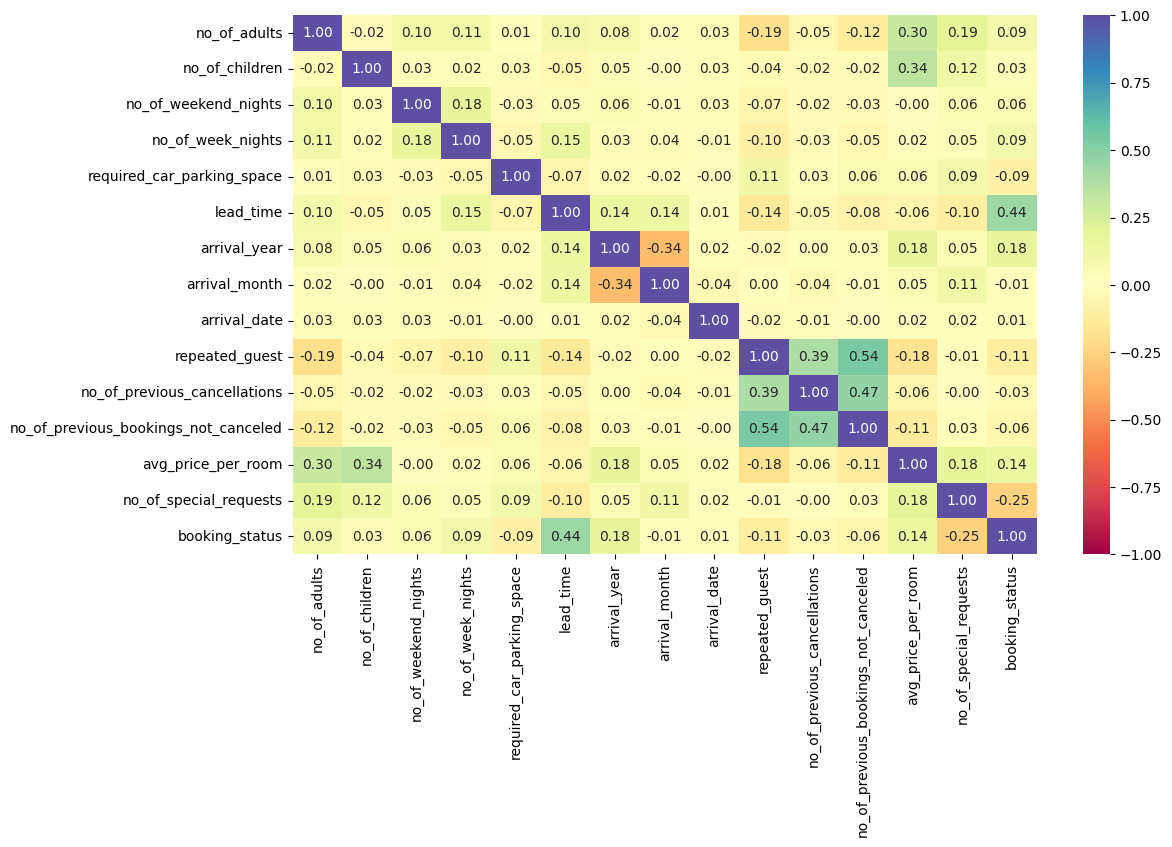

In [ ]:
#Create a correlation heatmap:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:  No significant high correlation among variables observed.

##Creating functions that will help with further analysis:

In [ ]:
# Function to plot distribution with regard to target:


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments:**

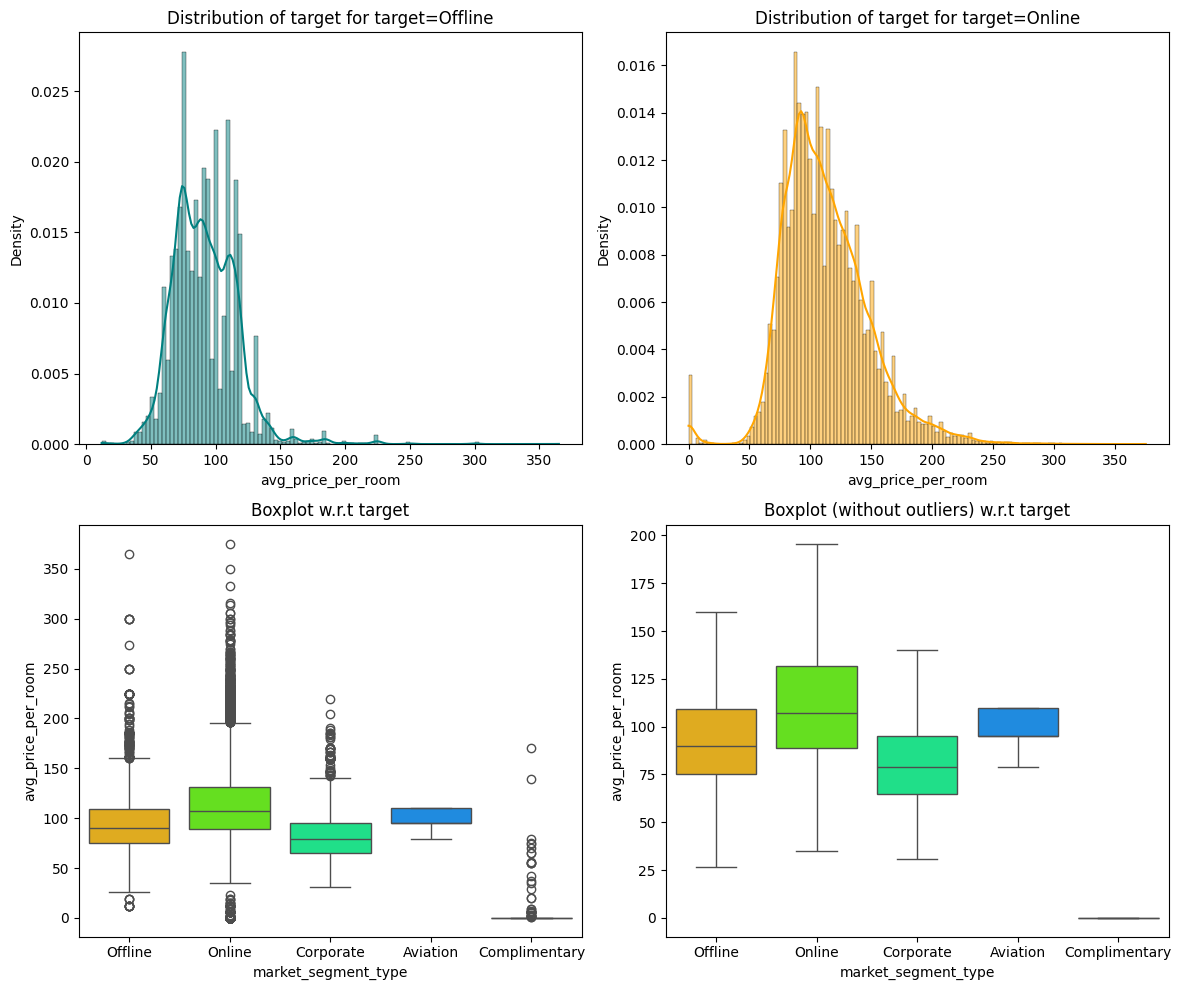

In [ ]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'market_segment_type')
plt.show()

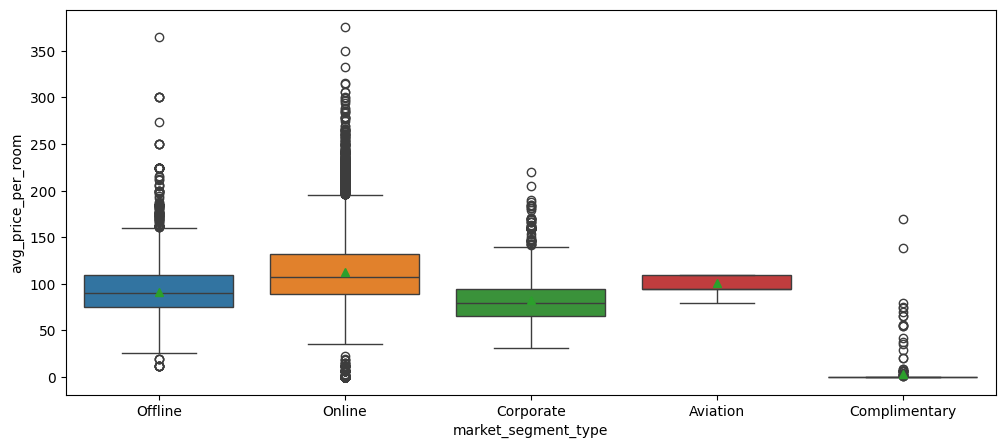

In [ ]:
# Create a boxplot showing the dynamic between average price per room and market segment type:
plt.figure(figsize=(12,5))
sns.boxplot(data, x='market_segment_type', y='avg_price_per_room', showmeans = True, hue = 'market_segment_type')
plt.show()

Observations:
The highest market segment is online bookings, which generates the highest average price per room.

The rooms priced at $0 are only occuring with online and complimentary bookings.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status:**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complimentary          391      0    391
------------------------------------------------------------------------------------------------------------------------


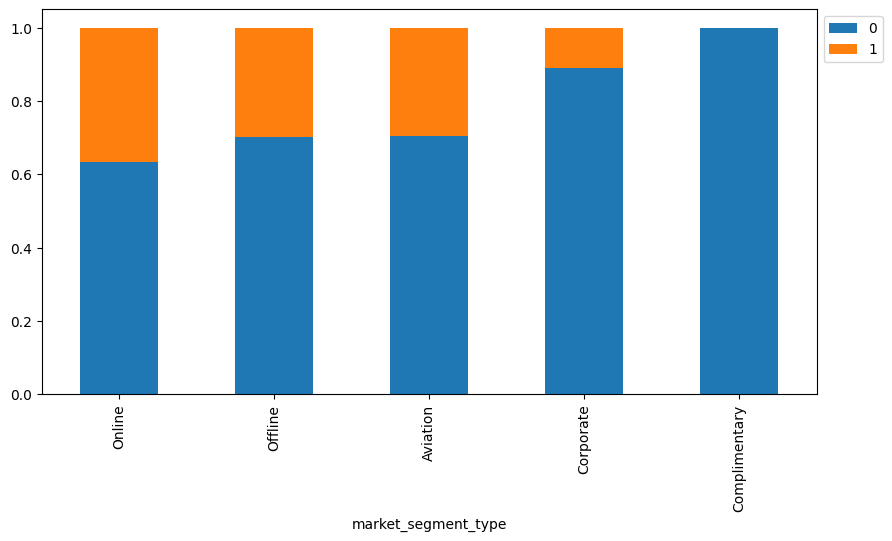

In [ ]:
# Create a stacked boxplot showing booking status across different market segments (1: canceled  0: not canceled):
stacked_barplot(data, 'market_segment_type', 'booking_status')
plt.show()

Observation:  We see that Online has the highest share of cancellations, followed by offline, aviation and corporate.

Note:  Offline, Aviation, and Corporate segments did not generate bookings with rooms at $0.

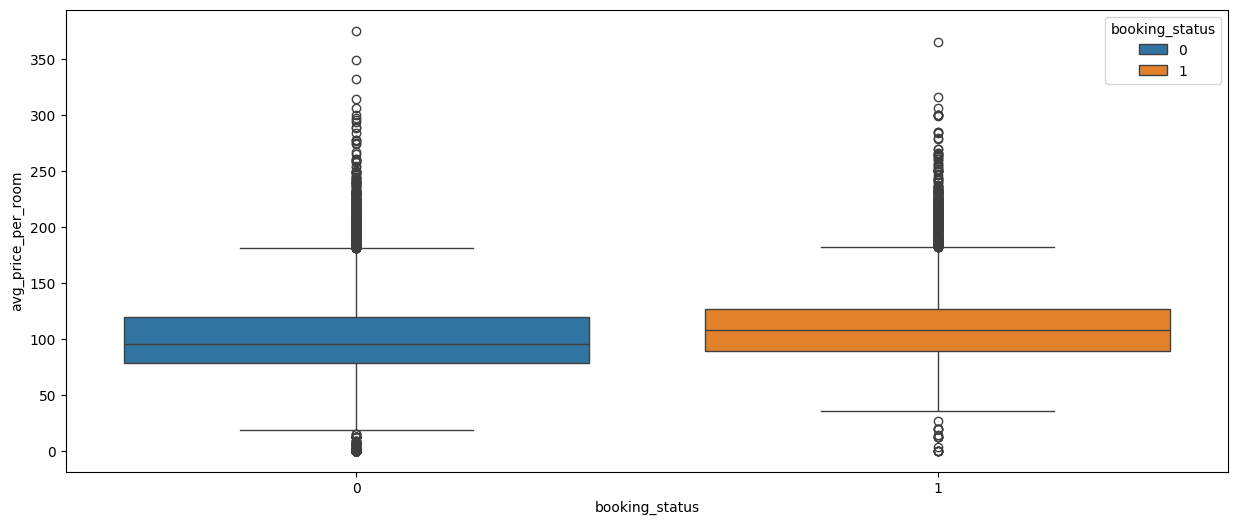

In [ ]:
# Create a boxplot showing the dynamic between average price per room and booking status:
plt.figure(figsize=(15,6))
sns.boxplot(data, x='booking_status', y='avg_price_per_room', hue='booking_status')
plt.show()

Observation:  There is a positive relation between cancelled reservations and average price per room.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations:**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


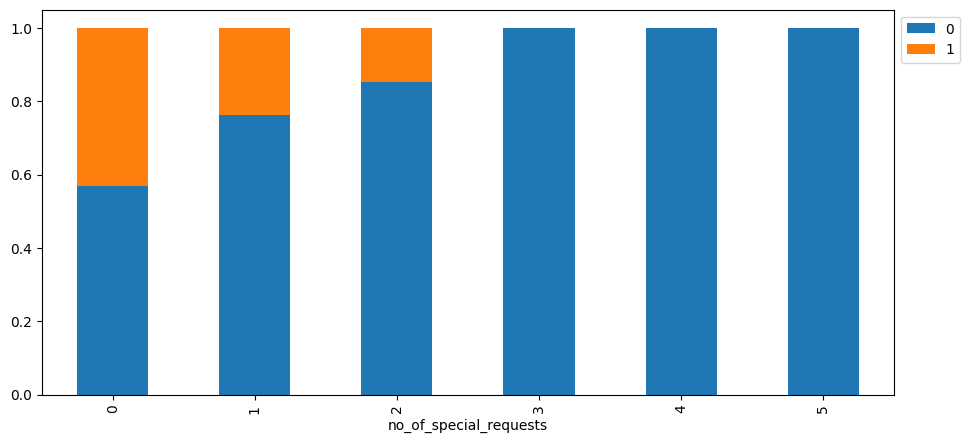

In [ ]:
# Create a boxplot showing if special requirements affects cancellations:
stacked_barplot(data, 'no_of_special_requests', 'booking_status')
plt.show()

Observation:  The more special requests are made, the less likely a cancellation will follow.

**Let's see if the special requests made by the customers impacts the prices of a room:**

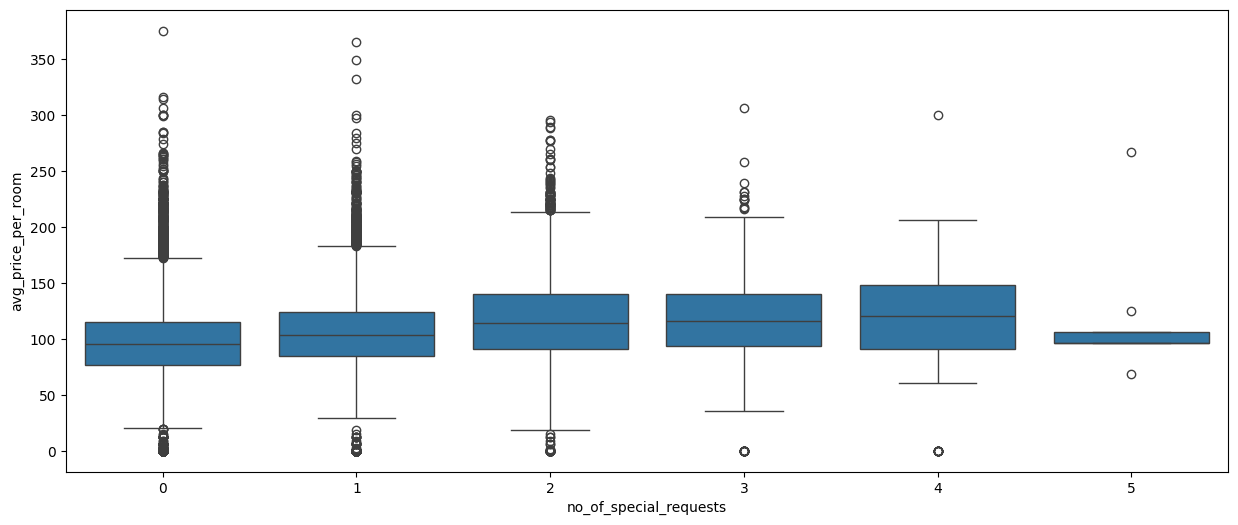

In [ ]:
# Create a boxplot showing the relationship between special requirements and average price per room:
plt.figure(figsize=(15,6))
sns.boxplot(data, x='no_of_special_requests', y='avg_price_per_room')
plt.show()

Observation:  We observe that the price of the average room increases with the increase of number of special requests till maximum of 4.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it:**

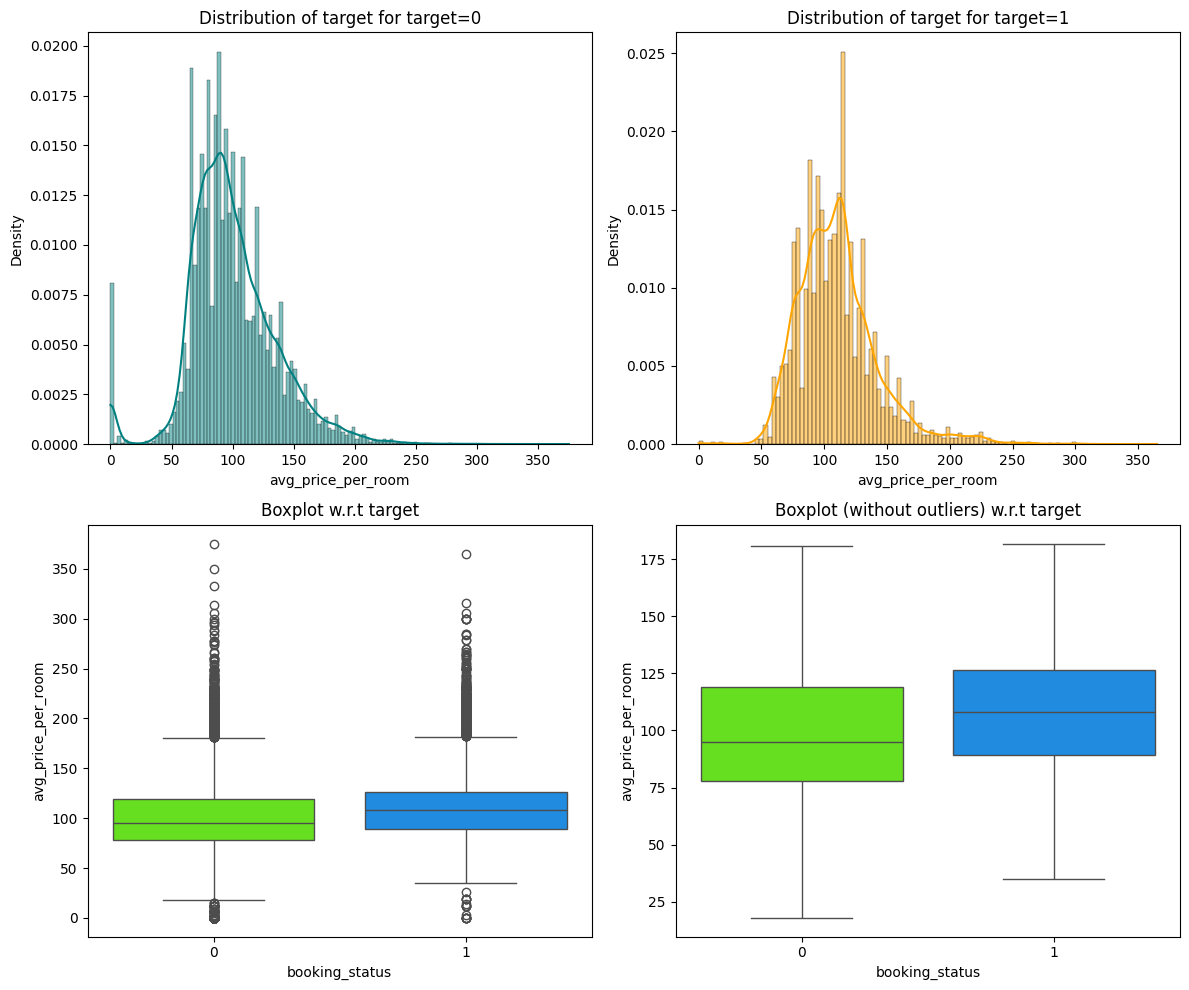

In [ ]:
# Create a plot that shows the positive correlation between booking status and average price per room.  Let's further analyze this:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")


Observation:  

Higher average priced rooms get canceled more often.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

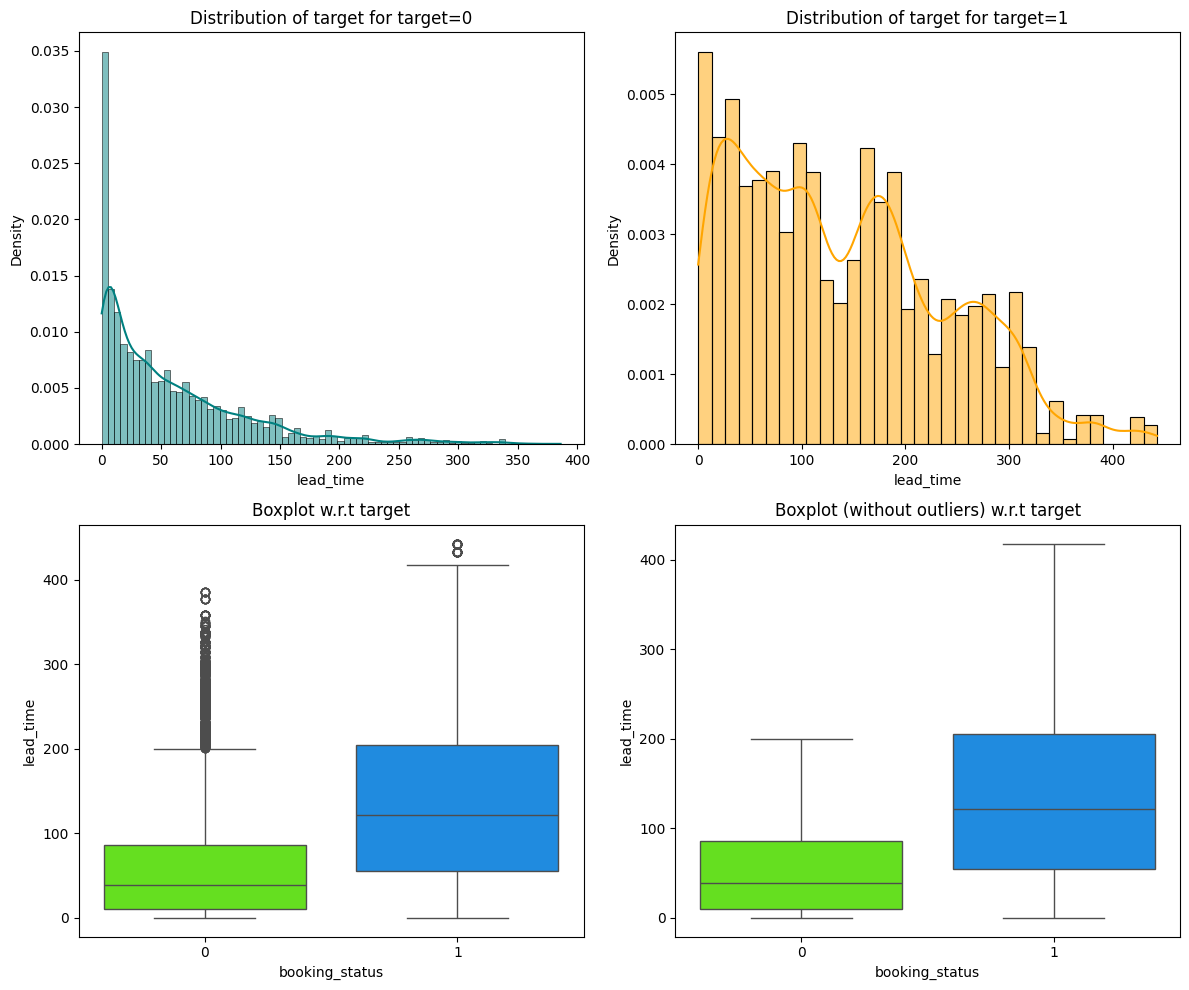

In [ ]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')


Observation:  

Rooms booked far in advance have a higher chance of cancellation.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [ ]:
# Create a new dataframe of no_of_children:
# & implies first statement needs to be true, before moving on to second statement
family_data = data[(data['no_of_children']>=0) & (data['no_of_adults']>1)]
family_data.shape


(28441, 18)

In [ ]:
family_data['no_of_family_members'] = (
    family_data['no_of_adults'] + family_data['no_of_children']
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


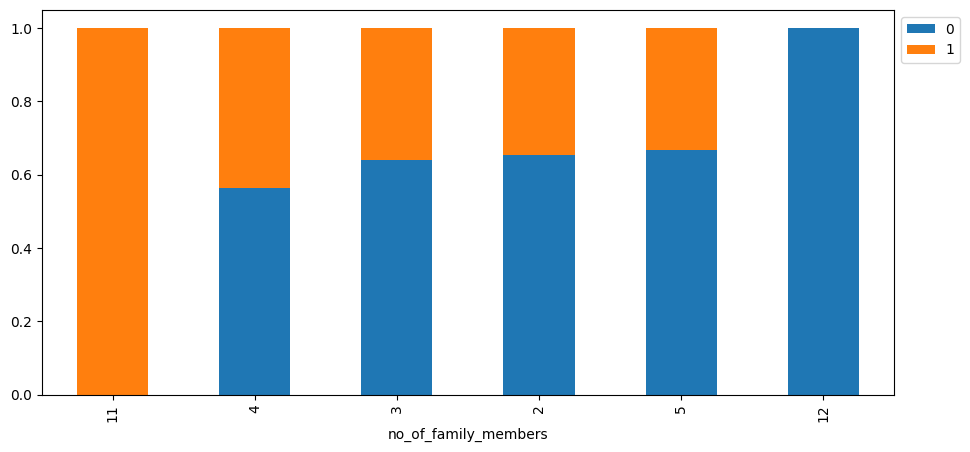

In [ ]:
# Create a stacked box plot outlining families and booking status:
stacked_barplot(family_data, 'no_of_family_members', 'booking_status')
plt.show()

Observation:

Families of 3 and 5 members have the same chance of cancelling their reservation as the standard party of 2.  Family of 4 has slightly higher chance of canceling.  

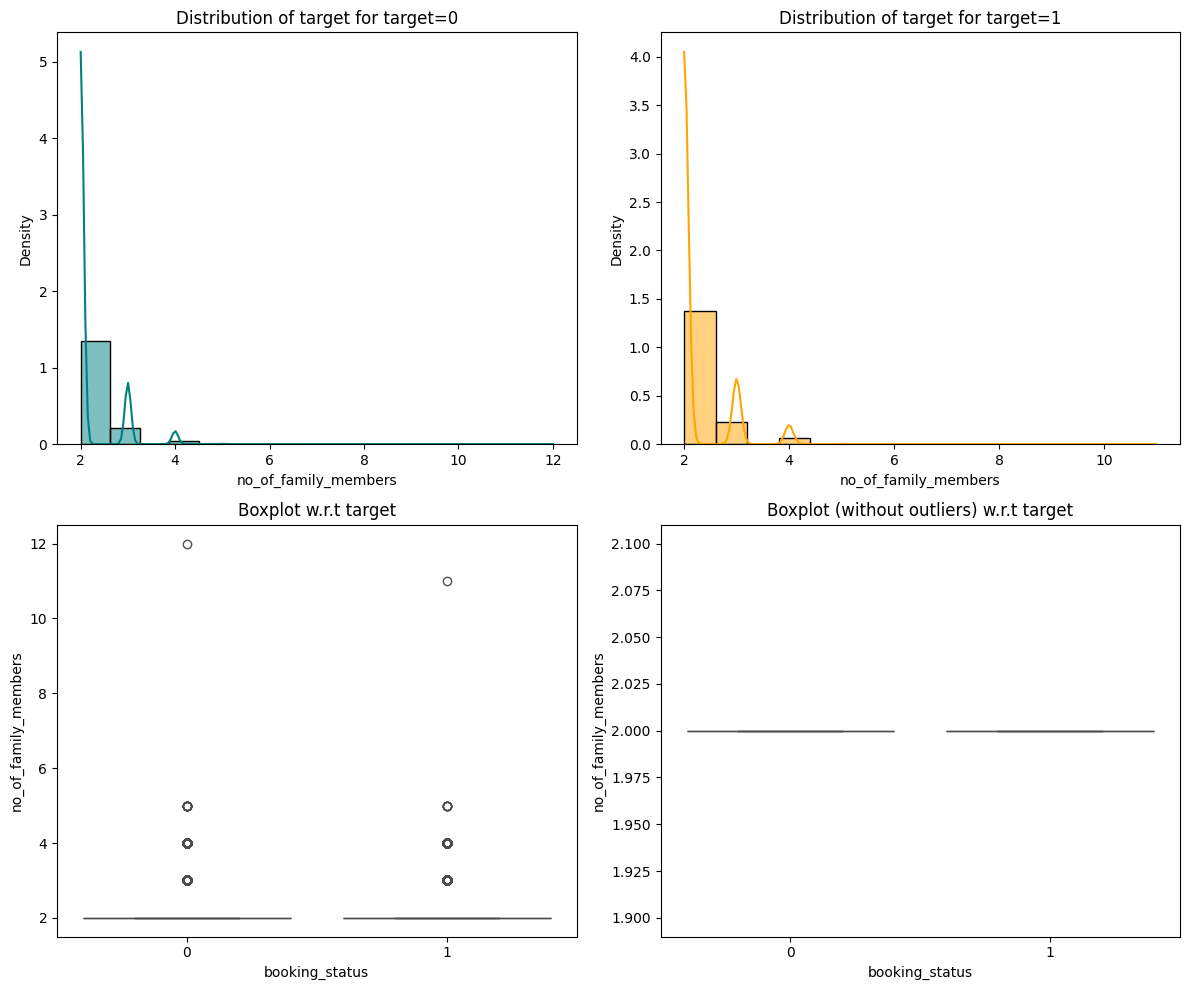

In [ ]:
distribution_plot_wrt_target(family_data, 'no_of_family_members', 'booking_status')

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [ ]:
# Create a new dataframe that consists of guests staying longer than one day at the hotel, including one day during the weekend:
# | or pipe, means OR:
# & first statement, AND second statement must be TRUE
# + first statement, plus second statement

stay_data = data[(data['no_of_week_nights']>0) & (data['no_of_weekend_nights']>0)]
stay_data.shape

(17094, 18)

booking_status      0     1    All
total_nights                      
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

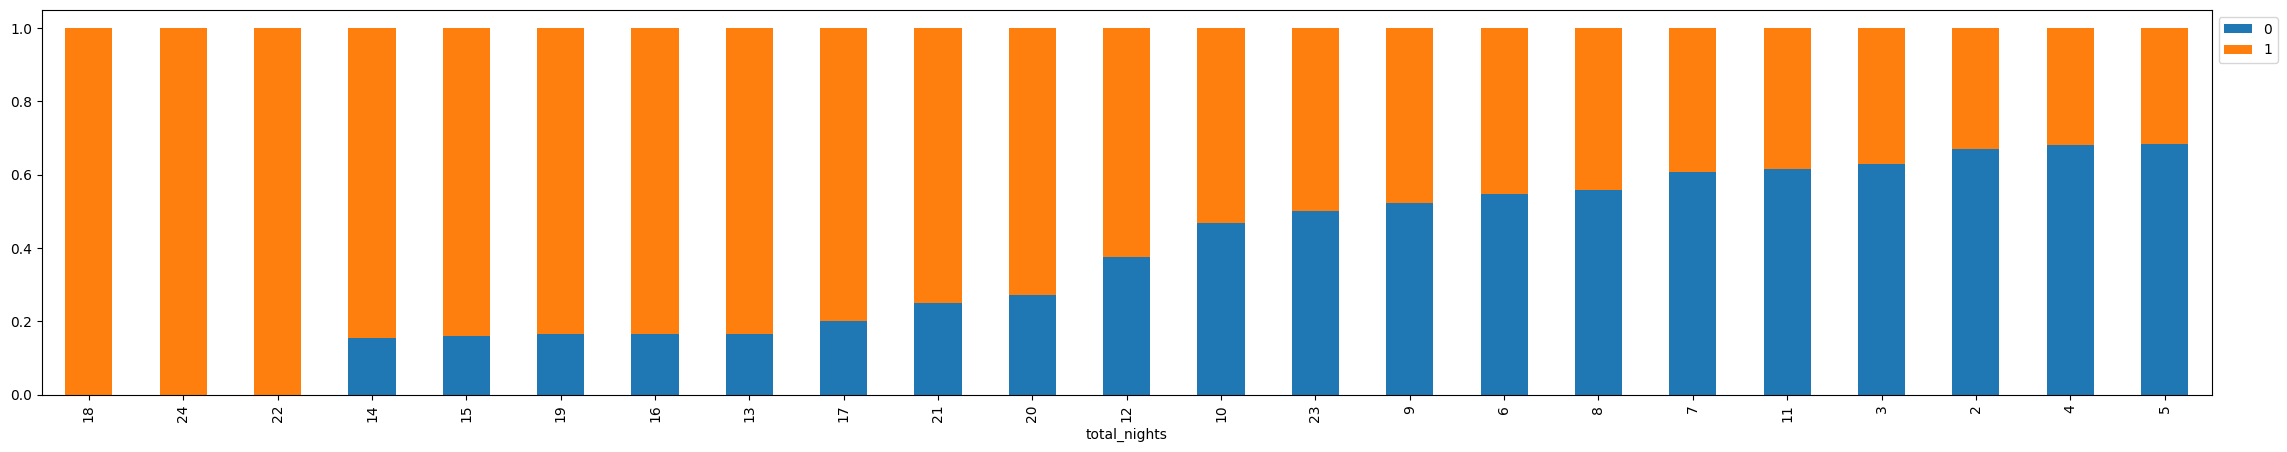

In [ ]:
# Create a stack bar plot showing the total night stay of guests, staying at least one day during weekend:
stay_data['total_nights'] = (
    stay_data['no_of_week_nights'] + stay_data['no_of_weekend_nights']
)
stacked_barplot(stay_data, 'total_nights', 'booking_status')
plt.show()

Observation:

Bookings with a 5, 4, or 2 day duration have comparatively the least cancellations.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


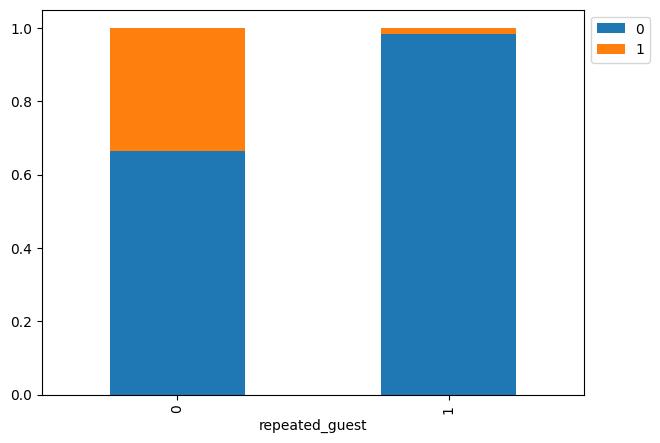

In [ ]:
# Create a plot showing repeated guests and their booking status:
stacked_barplot(data, 'repeated_guest', 'booking_status')
plt.show()

Observation:

Repeat guests rarely cancel, while first time guests cancelation frequency hovers around 33%.  

**Let's find out what the busiest months for the hotel are:**

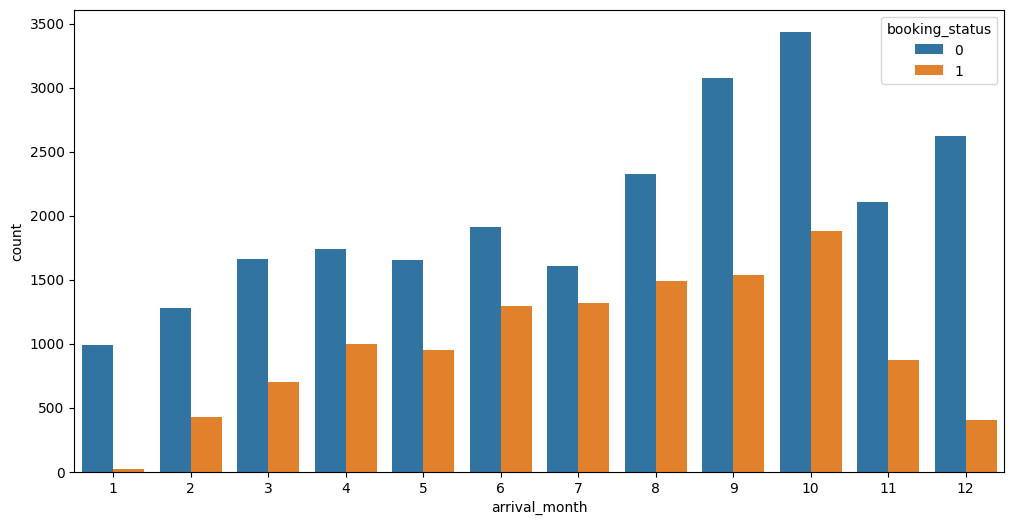

In [ ]:
# Create a histoplot for the busiest months of the hotel:
plt.figure(figsize=(12,6))
sns.countplot(data, x='arrival_month', hue='booking_status')
plt.show()

Observation:
Busiest months of the year are October, September and December.  Highest cancelllation months are October, September and August.

In [ ]:
# Let's check how many guests are staying at the hotel during the busiest months:
monthly_data = data.groupby(['arrival_month'])['booking_status'].count()
print(monthly_data)


arrival_month
1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: booking_status, dtype: int64


In [ ]:
# Create a dataframe with months and count of guests in each month:
monthly_data = pd.DataFrame(
    {'Month': list(monthly_data.index), 'Guests': list(monthly_data)}
)
print(monthly_data)

    Month  Guests
0       1    1014
1       2    1704
2       3    2358
3       4    2736
4       5    2598
5       6    3203
6       7    2920
7       8    3813
8       9    4611
9      10    5317
10     11    2980
11     12    3021


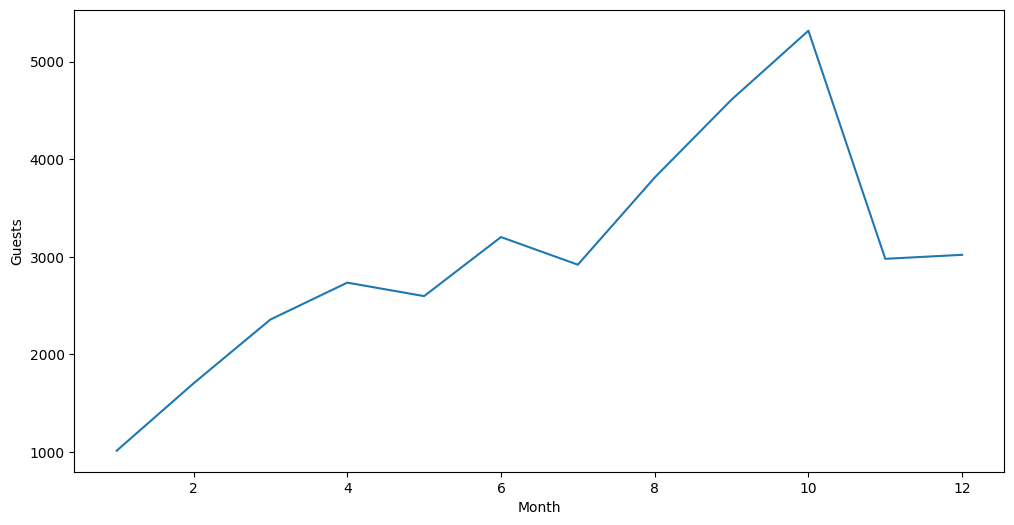

In [ ]:
# Plotting the trend over different months:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_data, x='Month', y='Guests')
plt.show()

**Let's check the percentage of bookings canceled each month**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


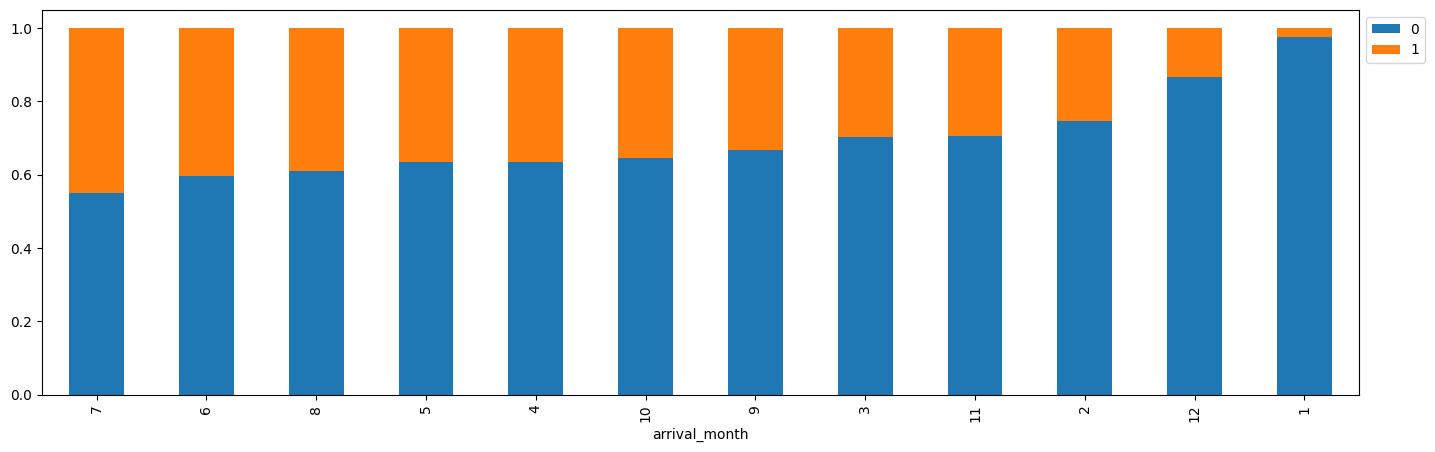

In [ ]:
# Create a plot showing the number of cancelled bookings each month:
stacked_barplot(data, 'arrival_month', 'booking_status')

Observation:
The highest percentage of cancellations take place during summer months July, June and August.  

January, December and February have the lowest percentage in cancellations.

**As hotel room prices are dynamic, Let's see how the prices vary across different months:**

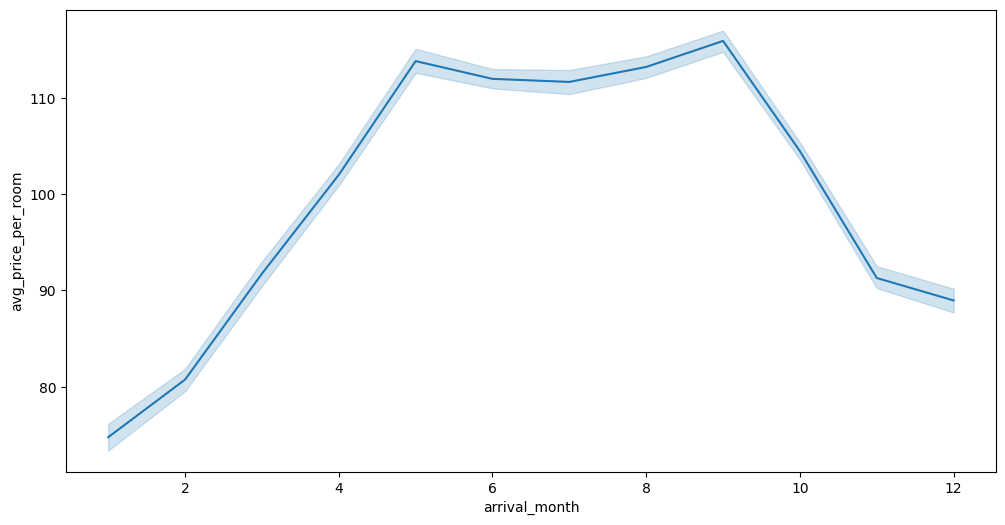

In [ ]:
# Create a lineplot that shows the dynamic between prices and months:
plt.figure(figsize=(12,6))
sns.lineplot(data, x='arrival_month', y='avg_price_per_room')
plt.show()

Observation:

The demand for rooms in highest in October, yet this month is not generating the highest average price per room.  This is a missed opportunity to raise more revenue.

Second missed opportunity are the low prices for rooms in December.  Demand for rooms in December is high, with an exceptionally low cancellation rate. For comparison, July has similar number of bookings, but cancellation rate, and average price per room are both much higher.

#Model Building

##Model evaluation criterion

##Model can make wrong predictions as:
1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

##Which case is more important?
Both the cases are important as:
1. If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.
2. If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

##How to reduce the losses?
Hotel would want F1 Score to be maximized:

The greater the F1 score, the higher the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Ensure predictors are a numpy array with float type
    predictors_array = predictors.values.astype(np.float64)

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors_array) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # Ensure predictors are a numpy array with float type
    predictors_array = predictors.values.astype(np.float64)

    y_pred = model.predict(predictors_array) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Predict which booking will be canceled:
X = data.drop(['booking_status'], axis=1)
y = data['booking_status']

# Adding a constant, because otherwise the model would be forced to pass through the origin (0,0), which may not be appropriate for the data.
# The constant term helps to account for any systematic bias in the data that is not captured by the predictor variables.
# The constant ensures that the residuals (the difference between predicted and actual values) have a mean of zero.
# This a desirable property for a well-fitting model.

X = sm.add_constant(X)

# Encode categorical features, by creating dummies for x:
X = pd.get_dummies(X, drop_first= True)

# Splitting the data in training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [ ]:
print("Shape of training set is:", X_train.shape)

Shape of training set is: (25392, 28)


In [ ]:
print("Shape of test set is:", X_test.shape)

Shape of test set is: (10883, 28)


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts (normalize = True))

Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64


In [ ]:
print("Percentage of classes in test set:")
print(y_test.value_counts (normalize = True))

Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


#### Building Logistic Regression Model

In [ ]:
# Fitting logistic regression model:
log_reg = sm.Logit(y_train, X_train.astype (float))
lg = log_reg.fit(Disp = False)

print(lg.summary())

         Current function value: 0.425075
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Mon, 28 Jul 2025   Pseudo R-squ.:                  0.3292
Time:                        18:04:06   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928

The coefficients of the logistic regression model are in terms of log(odd).

In [ ]:
print('Training performance:')
model_performance_classification_statsmodels(lg, X_train, y_train)


Training performance:


Accuracy  Recall  Precision      F1
0   0.80596 0.63410    0.73961 0.68280

We want to maximize the F1 score to minimize the False Positives and False Negatives.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# Check multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a function to check for multicollinearity in the data using the variance inflation factor filter:
def check_multicollinearity(data, threshold=5):
    """
    Check for multicollinearity in the data using the variance inflation factor filter.
    """

In [ ]:
# Let's define a function to check VIF:
def check_vif(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range (len(predictors.columns))]
    return vif


**How to interpret VIF values to check for multicollinearity:**

- VIF of 1: Indicates no correlation between the feature and any other features.
- VIF between 1 and 5: Suggests a moderate correlation, but generally not considered problematic.
- VIF above 5 (or sometimes 10): Indicates high correlation with other features, which can be a sign of multicollinearity. Some sources use a more conservative threshold of 5, while others use 10.

In [ ]:
check_vif(X_train.astype(float))

feature            VIF
0                                  const 39491186.47744
1                           no_of_adults        1.34849
2                         no_of_children        1.97862
3                   no_of_weekend_nights        1.06949
4                      no_of_week_nights        1.09567
5             required_car_parking_space        1.03998
6                              lead_time        1.39518
7                           arrival_year        1.43167
8                          arrival_month        1.27637
9                           arrival_date        1.00674
10                        repeated_guest        1.78361
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06421
14                no_of_special_requests        1.24730
15         type_of_meal_plan_Meal Plan 2        1.27325
16         type_of_meal_plan_Meal Plan 3        1.02522
17        type_of_meal_plan_Not Selected        1.27252
18        room_type_reserved_Room_Type 2        1.10151
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36261
21        room_type_reserved_Room_Type 5        1.02797
22        room_type_reserved_Room_Type 6        1.97490
23        room_type_reserved_Room_Type 7        1.11559
24     market_segment_type_Complimentary        4.50229
25         market_segment_type_Corporate       16.92846
26           market_segment_type_Offline       64.11425
27            market_segment_type_Online       71.17686

We observe there is no significant multicollinearity present among the features, since the VIF factor is below 5.  The constant and categorical features are not included.  

This means the values of the coefficient and p-values are reliable.

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

## Building a Logistic Regression model

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    # Explicitly cast columns ['type_of_meal_plan'], ['room_type_reserved'], ['market_segment_type'] to float to avoid ValueError
    model = sm.Logit(y_train, x_train_aux.astype(float)).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


## Model performance evaluation

In [ ]:
# Let's drop features with p-values higher than 1, as they do not significantly impact the target variable:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
# Let's fit the model:
log_reg1 = sm.Logit(y_train, X_train1.astype (float))
lg1 = log_reg1.fit(Disp = False)

print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425716
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 28 Jul 2025   Pseudo R-squ.:                  0.3282
Time:                        18:04:13   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612    

In [ ]:
# Let's check if there is multi-collinearity in this model, and check the Variance Inflation Factor:
check_vif(X_train1.astype(float))

feature            VIF
0                            const 39211924.93777
1                     no_of_adults        1.33122
2                   no_of_children        1.97606
3             no_of_weekend_nights        1.06047
4                no_of_week_nights        1.08992
5       required_car_parking_space        1.03925
6                        lead_time        1.37608
7                     arrival_year        1.42183
8                    arrival_month        1.26752
9                   repeated_guest        1.53167
10    no_of_previous_cancellations        1.20390
11              avg_price_per_room        1.73153
12          no_of_special_requests        1.23778
13   type_of_meal_plan_Meal Plan 2        1.25879
14  type_of_meal_plan_Not Selected        1.25168
15  room_type_reserved_Room_Type 2        1.10091
16  room_type_reserved_Room_Type 4        1.34558
17  room_type_reserved_Room_Type 5        1.01765
18  room_type_reserved_Room_Type 6        1.94485
19  room_type_reserved_Room_Type 7        1.05838
20   market_segment_type_Corporate        1.45292
21     market_segment_type_Offline        1.55758

Observation:

All features have a VIF between 1 and 2, which means minimum correlation.

In [ ]:
#  Now that we have determined the last logistic regression model has no multi-collinearity, we can check the training performance with the F 1 score:
log_reg1_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
print('Training performance:')
log_reg1_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80537 0.63243    0.73900 0.68157

Observation:

F1 score hasn't improved much, stays around 0.68

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11487         1.16411               1.11466   
Change_odd% -100.00000      11.48701        16.41072              11.46616   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04260                     0.20298    1.01583   
Change_odd%            4.25996                   -79.70242    1.58342   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57291        0.95841         0.06484   
Change_odd%      57.29054       -4.15858       -93.51608   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25705             1.01937   
Change_odd%                      25.70460             1.93739   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22993                        1.17855   
Change_odd%               -77.00672                       17.85489   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33103                         0.70069   
Change_odd%                        33.10347                       -29.93109   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75327                         0.47893   
Change_odd%                       -24.67346                       -52.10654   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38034                         0.23840   
Change_odd%                       -61.96631                       -76.15999   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45262                      0.16771  
Change_odd%                      -54.73798                    -83.22899

Observation:

Based on the Odds dataframe, we determine that of all the predictor variables, the column ['arrival_year'] has the highest odds ratio with 1.57291, meaning bookings with a leadtime of more than a year have a chance of cancellation of 57% per added year.

#### Checking model performance on the training set

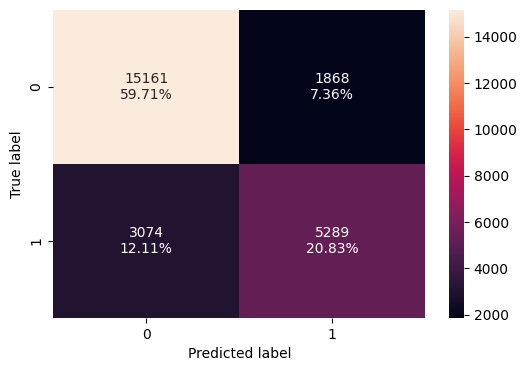

In [ ]:
# Creating a confusion matrix:
confusion_matrix_statsmodels(lg1, X_train1, y_train)


Observation:

True Positives: 59.71%.  The booking is cancelled and the model predicts a cancellation
True Negatives: 20.83%.  The booking is not cancelled, and the model predicts no cancellation.

False Positives: 7.36%. The booking is not cancelled, but the model predicts a cancellation.
False Negatives: 12.11%.  The booking is cancelled, but the model does not predict a cancellation.

## Model Summary

* The logistic regression model predicts that lead time is the most influential factor in determining the odds of cancellation.  

* Based on the confusion matrix, the logistic regression model has a 12.11% chance of failing to predict cancellations, and a 7.36% chance of predicting a cancellation when in fact none occur.

* The training performannce *F1 score* that minimizes the false positives and false negatives is around 0.68.

## ROC - AUC on training set:

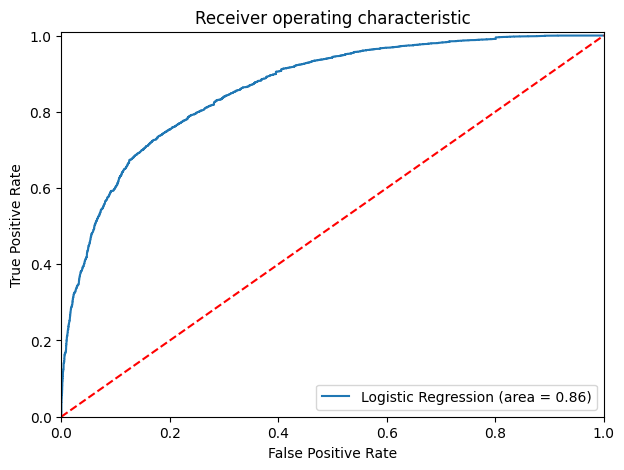

In [ ]:
# Calculate the Receiver-Operating characteristic Curve - Area Under the Curve:
# Make sure to convert all X_train1 values into float datatype first.

from sklearn.metrics import roc_auc_score

logit_roc_auc_train= roc_auc_score(y_train, lg1.predict(X_train1.values.astype(np.float64)))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1.values.astype(np.float64)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate the ROC-AUC score:
print("ROC-AUC score for training set is:", logit_roc_auc_train)


ROC-AUC score for training set is: 0.8626354608856783


#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve:

In [ ]:
# The optimal cut off would be where tpr is high and fpr is low
# Let's calculate the optimal threshold as per AUC-ROC curve:

#fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1.values.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("Optimal threshold using AUC-ROC curve:", optimal_threshold_auc_roc)




Optimal threshold using AUC-ROC curve: 0.3696037915893021


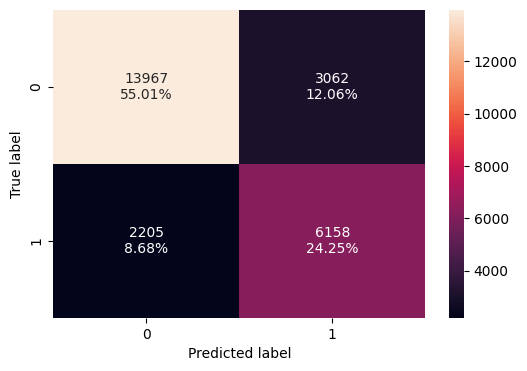

In [ ]:
# Creating confusion matrix based on AUC-ROC curve optimal threshold of 0.369:
confusion_matrix_statsmodels(lg1, X_train1, y_train, optimal_threshold_auc_roc)

Observation:  The percentages for the False Positives and False Negatives have been pretty much reversed, compared to the logistic regression model's confusion matrix.

In [ ]:
# Checking model performance for this model using the optimal ROC-AUC threshold:
log_reg1_model_train_perf_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, optimal_threshold_auc_roc)
print('Training performance:')
log_reg1_model_train_perf_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79257 0.73634    0.66790 0.70045

Observation:  AUC-ROC curve provides better recall and F1 score than the logistic regression model

#### Let's use Precision-Recall curve and see if we can find a better threshold

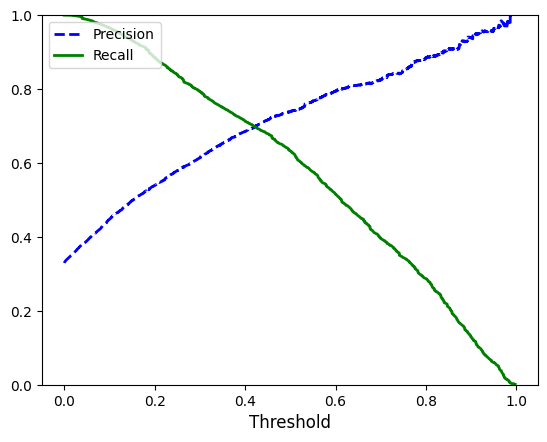

In [ ]:
# Let's use precision-recall curve and see if we can find a better threshold:
from sklearn.metrics import precision_recall_curve
# Let's plot the precision curve:
precisions, recalls, thresholds = precision_recall_curve(y_train, lg1.predict(X_train1.values.astype(float)))
# Let's show the precision curve in a plot:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=12)
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [ ]:
# Find the threshold where precision and recall are approximately equal, using the line plot:
print ("Optimal threshold where precision and recall metrics are balanced is around 0.42")

# Calculate the optimal threshold value that will maximize product:
optimal_threshold_pr_curve = thresholds[np.argmax(precisions * recalls)]

print("Optimal threshold based on the point where precision and recall are maximized for product:", optimal_threshold_pr_curve)

Optimal threshold where precision and recall metrics are balanced is around 0.42
Optimal threshold based on the point where precision and recall are maximized for product: 0.3696037915893021


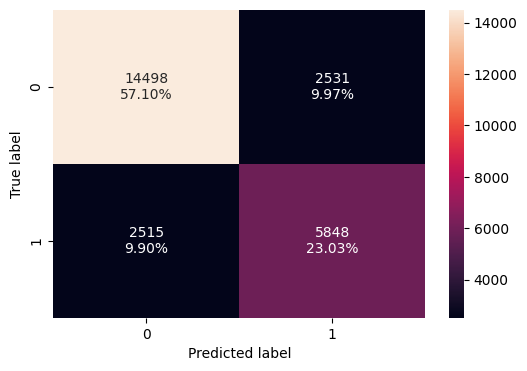

In [ ]:
# Creating the confusion matrix using the optimal threshold where precision and recall lines intersect at 0.42:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold = 0.42)

In [ ]:
# Calculate the F1 score, precision, recall and accuracy metrix for the training data, using the optimal threshold pr curve:
log_reg1_model_train_perf_pr_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold= 0.42)
print('Training performance:')
log_reg1_model_train_perf_pr_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80128 0.69927    0.69794 0.69860

Observation:

* The metrics are the same for both the ROC-AUC and PR Curve based on optimal threshold values.

* If we go by threshold value of 0.42 where the Precision and Recall lines intersect, the calculated F1 score is slightly lower than that based on the optimal threshold value.


## Let's check the performance on the test set:

**Using model with default threshold:**

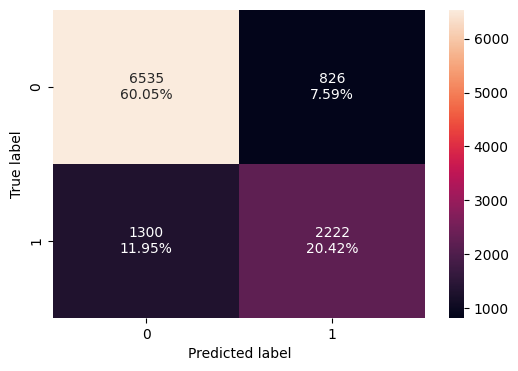

In [ ]:
# Creating confusion matrix for the test set, using the default threshold of 0.5:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
# Let's create the F1 score and other metrics for the test set with the default threshold of 0.5:
log_reg1_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=0.5)
print('Test performance:')
log_reg1_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

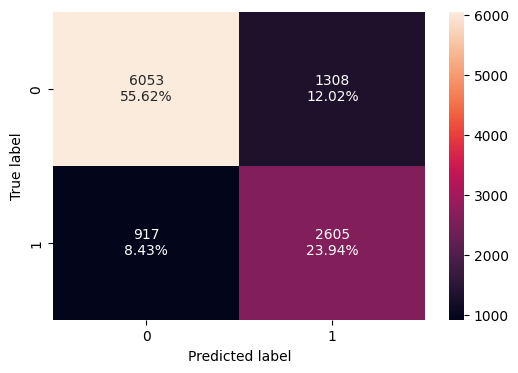

In [ ]:
# Checking confusion matrix for the test set of this model using optimal ROC-AUC threshold of 0.369:
confusion_matrix_statsmodels(lg1, X_test1, y_test, optimal_threshold_auc_roc)


In [ ]:
# Checking model performance for test set of this model using the optimal ROC-AUC threshold of 0.369:
log_reg1_model_test_perf_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, optimal_threshold_auc_roc)
print('Test performance:')
log_reg1_model_test_perf_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

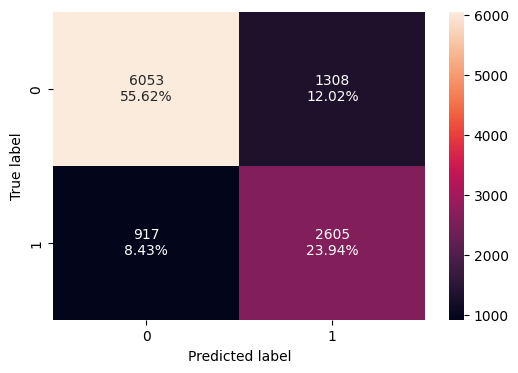

In [ ]:
# Let's create a confusion matrix for the test set with the optimal Precison and Recall threshold of 0.42:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = 0.37)

In [ ]:
# Let's test the Test performance using the threshold of 0.42:
log_reg1_model_test_perf_pr_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=0.42)
print('Test performance:')
log_reg1_model_test_perf_pr_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80364 0.70386    0.69381 0.69880

##Model Performance Summary:

In [ ]:
# Training performance summary:

models_train_performance_comparison_df = pd.concat(
    [log_reg1_model_train_perf.T,
     log_reg1_model_train_perf_auc_roc.T,
     log_reg1_model_train_perf_pr_curve.T
    ],
    axis = 1,
  )
models_train_performance_comparison_df.columns = [
      "Log Reg default threshold",
      "Log Reg AUC-ROC threshold",
      "Log Reg Prec/Recall curve threshold"]

print("Train performance comparison:")
models_train_performance_comparison_df

Train performance comparison:


Log Reg default threshold  Log Reg AUC-ROC threshold  \
Accuracy                     0.80537                    0.79257   
Recall                       0.63243                    0.73634   
Precision                    0.73900                    0.66790   
F1                           0.68157                    0.70045   

           Log Reg Prec/Recall curve threshold  
Accuracy                               0.80128  
Recall                                 0.69927  
Precision                              0.69794  
F1                                     0.69860

Observation:
* default threshold = 0.05
* AUC-ROC threshold = 0.37
* PR curve threshold= 0.42

Highest F1 score of 0.70 is achieved with AUC-ROC threshold value of 0.37.

In [ ]:
# Test performance summary:

models_test_performance_comparison_df = pd.concat(
    [log_reg1_model_test_perf.T,
     log_reg1_model_test_perf_auc_roc.T,
     log_reg1_model_test_perf_pr_curve.T
    ],
    axis = 1,
  )
models_test_performance_comparison_df.columns = [
      "Log Reg default threshold",
      "Log Reg AUC-ROC threshold",
      "Log Reg Prec/Recall curve threshold"]

print("Test performance comparison:")
models_test_performance_comparison_df

Test performance comparison:


Log Reg default threshold  Log Reg AUC-ROC threshold  \
Accuracy                     0.80465                    0.79555   
Recall                       0.63089                    0.73964   
Precision                    0.72900                    0.66573   
F1                           0.67641                    0.70074   

           Log Reg Prec/Recall curve threshold  
Accuracy                               0.80364  
Recall                                 0.70386  
Precision                              0.69381  
F1                                     0.69880

Observation:
default threshold = 0.05
AUC-ROC threshold = 0.37
PR curve threshold= 0.42
Given these thresholds, the highest F1 score of 0.70 is achieved with AUC-ROC threshold value of 0.37.

## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
# Determine target variable:
y = data['booking_status']
X = data.drop(['booking_status'], axis=1)

# Convert categorical values into dummies:
X = pd.get_dummies(X, drop_first = True)
# If you want to be specific:  X = pd.get_dummies(X, drop_first=True, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

# Split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Double check if the dummy function worked.  The original dataframe was not modified, but the X df has the new created columns for dummy variables:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [ ]:
# Check shape of training and test set, and percentage of classes in training and test sets:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


In [ ]:
# Initialize the Decision Tree classifier
# We'll start with a basic model without specifying parameters, then tune it later if needed:
dt_model = DecisionTreeClassifier(random_state=1)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Let's create functions to calculate the confusion matrix and the different metrics, so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

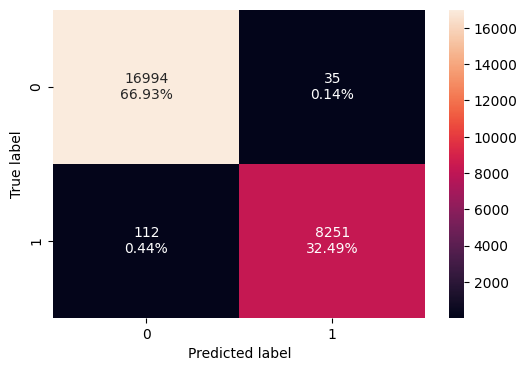

In [ ]:
# Checking model performance on training set:
confusion_matrix_sklearn(dt_model, X_train, y_train)

In [ ]:
# Check model performance metrics on training set:
decision_tree_perf_train = model_performance_classification_sklearn(dt_model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

Observation:

Model is able to classify all the data points on the training set.
0 errors on the training set, each sample has been classified correctly.

As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set:

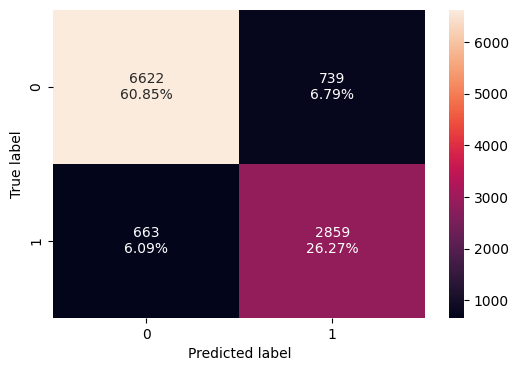

In [ ]:
# Check confusion matrix for the test set:
confusion_matrix_sklearn(dt_model, X_test, y_test)

In [ ]:
# Check model performance metrics on the test set:
decision_tree_perf_test = model_performance_classification_sklearn(dt_model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

The F1 score is better than that of the logistic regression model.

## Do we need to prune the tree?

**Before pruning the tree let's check the important features.**

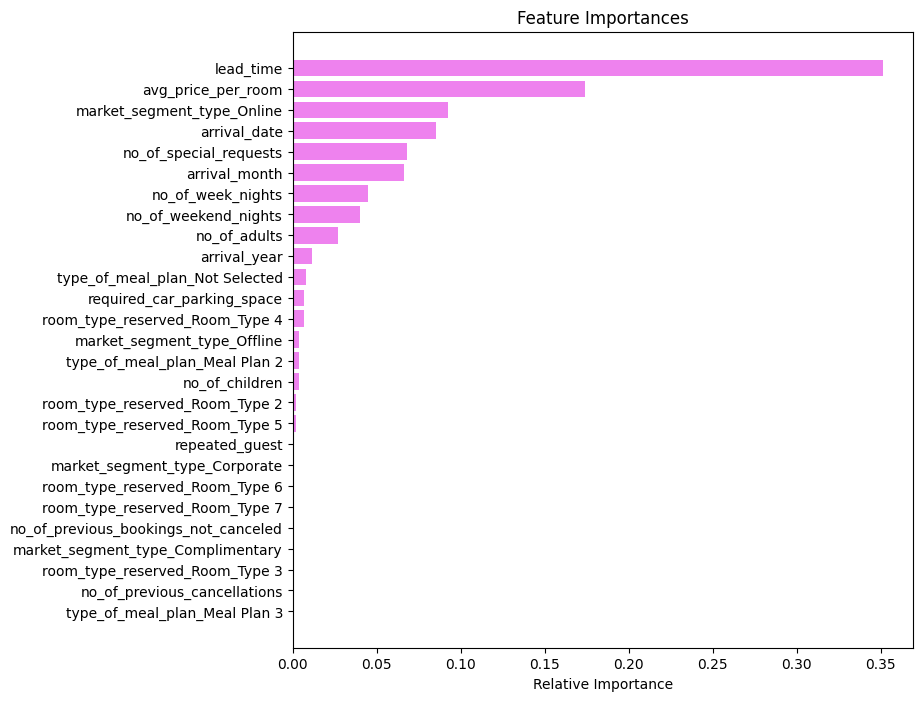

In [ ]:
feature_names = list(X_train.columns)
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(6),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

#### Checking performance on training set

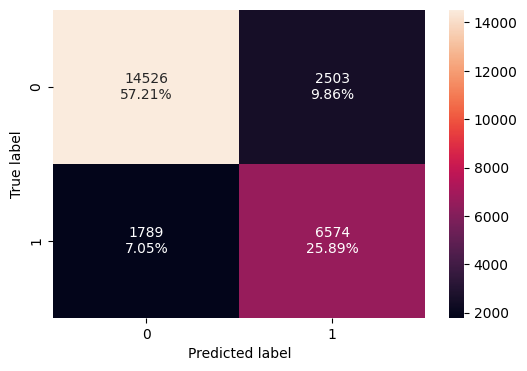

In [ ]:
# Create confusion matrix for training data:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Check performance metrics for training data:
decision_tree_perf_train_tuned = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_perf_train_tuned

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

#### Checking performance on test set:

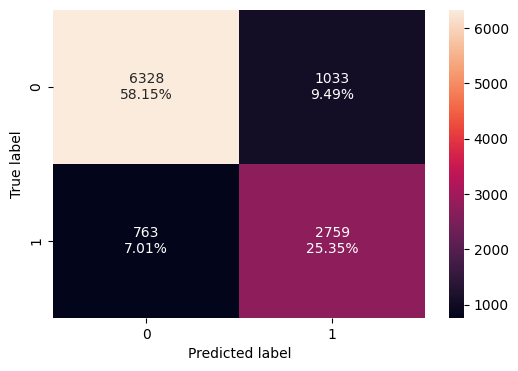

In [ ]:
# Create pruned tree confusion matrix for test set:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# Check performance metrics for pruned tree test set:
decision_tree_perf_test_tuned = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_perf_test_tuned

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

#### Visualizing the Decision Tree

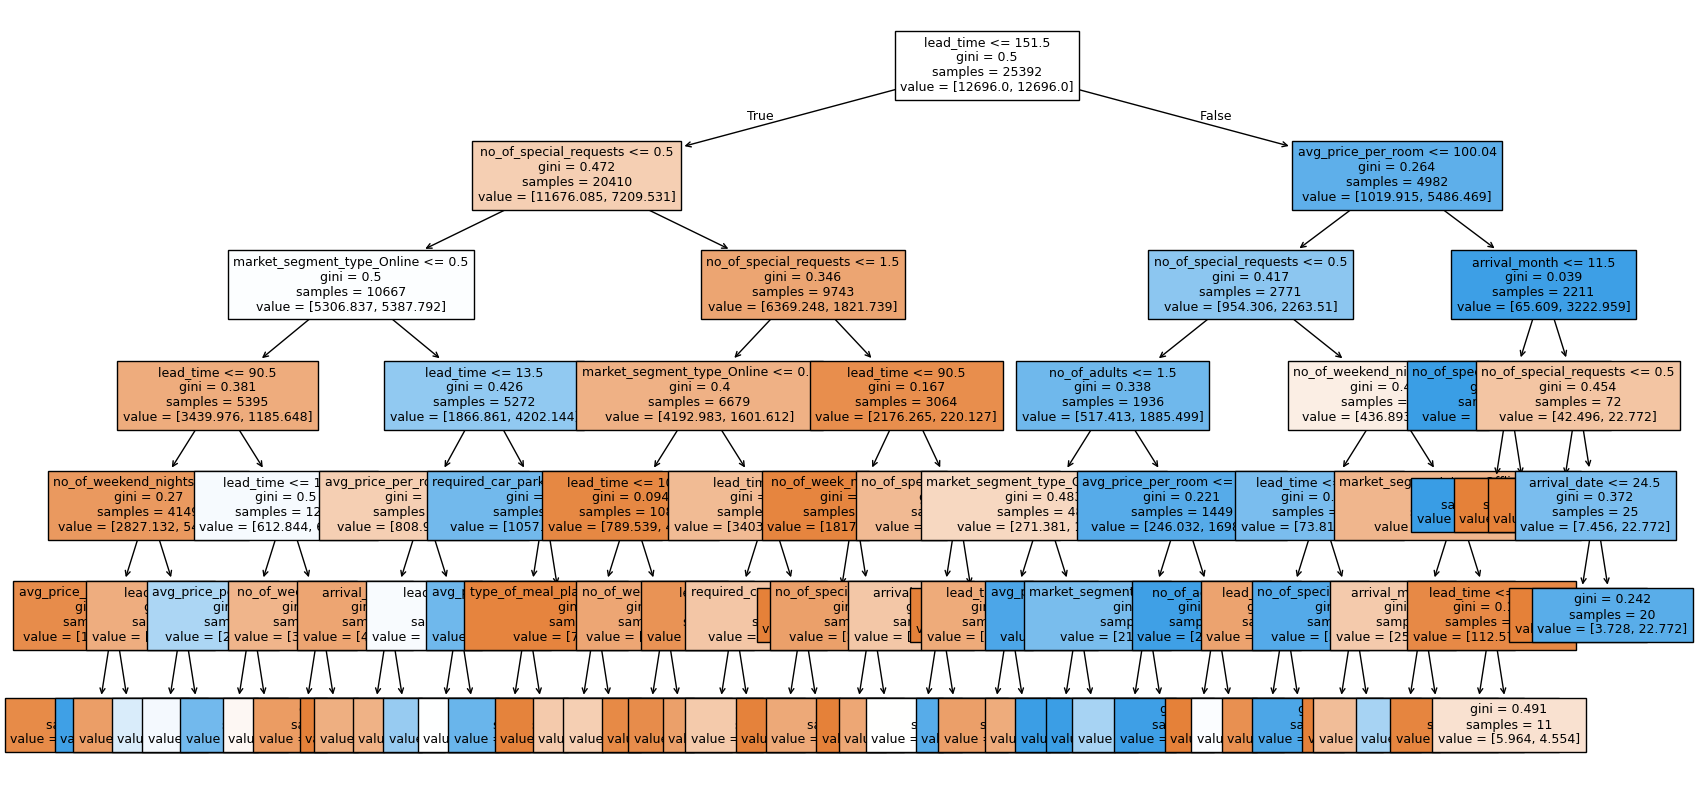

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

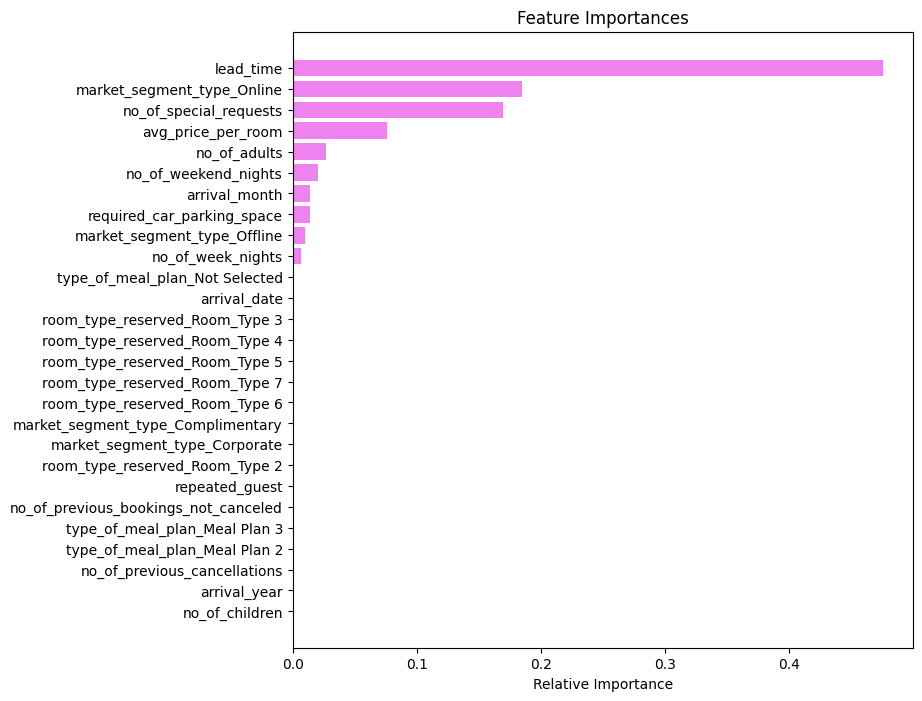

In [ ]:
# importance of features in the pruned tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**:  technique to find the optimal pruning parameter (ccp_alpha) for the decision tree


In [ ]:
# Create classifier, path, and determine optimal pruning parameter and impurities:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced") # clf = classifier
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities # ccp_alpha = optimal pruning parameter for dt

In [ ]:
# Show path with ccp_alphas (optimal pruning parameters) and impurities for the dataframe:

pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1853     0.00890     0.32806
1854     0.00980     0.33786
1855     0.01272     0.35058
1856     0.03412     0.41882
1857     0.08118     0.50000

[1858 rows x 2 columns]

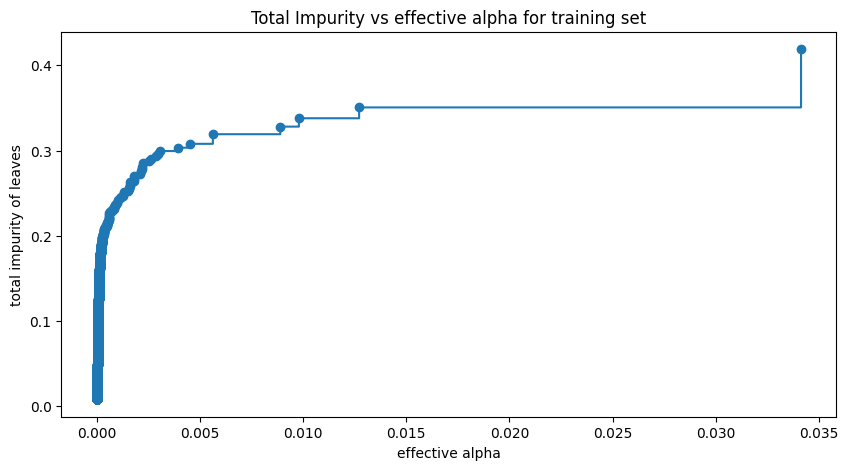

In [ ]:
# Create a plot showing impurities and ccp_alphas (Cost Complexity Pruning alpha):
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

The plot shows that as ccp_alpha increases, the total impurity of the leaves also increases.  This is because stronger pruning removes branches and nodes, resulting in a smaller tree with fewer, but potentially more impure leaves.

The goal of cost complexity pruning is to find a ccp_alpha value that balances the complexity of the tree and the impurity to avoid overfitting.  

We might look for a point on this curve where the impurity starts to increase significantly, indicating that further pruning might be removing valuable structure from the tree.




## Next we train a decision tree using effective alphas:

In [ ]:
%%time
# Run the loop to train trees with different alphas
clfs = []
for alpha in ccp_alphas: # Use 'alpha' as the loop variable
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)

# The last classifier in clfs corresponds to the largest alpha value
# Access the last element of the original ccp_alphas array
print(
    "Number of nodes in the last tree is: {}, with ccp_alpha: {}" .format(clfs[-1].tree_.node_count, ccp_alphas[-1])
)

Number of nodes in the last tree is: 1, with ccp_alpha: 0.08117914389136915
CPU times: user 5min 45s, sys: 773 ms, total: 5min 46s
Wall time: 5min 48s


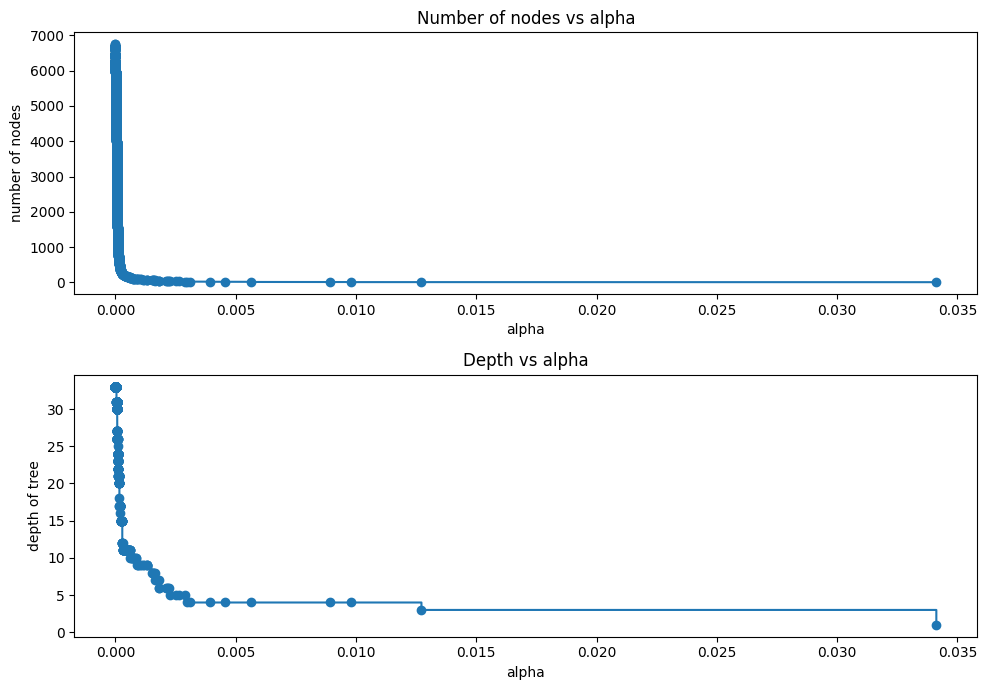

In [ ]:
# Create a plot showing number of tree nodes vs alpha, and depth of tree vs alpha:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


#### F1 Score vs alpha for training and testing sets:

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

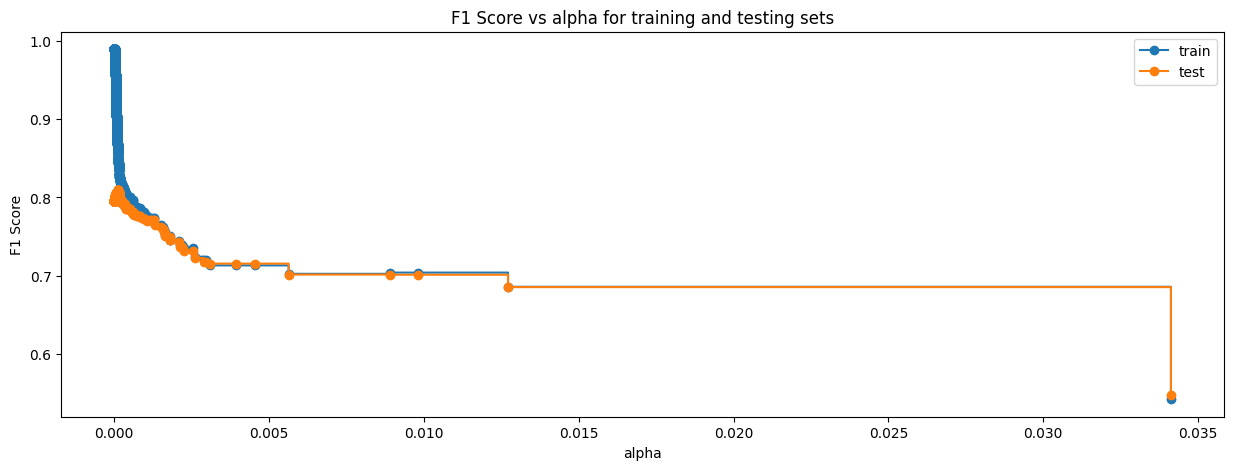

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Observation:

It looks like pruning after a tiny peak improvement in the very beginning, is only detrimental to the f1 score in the long run.

## Model Performance Comparison and Conclusions

Let's calculate which ccp_alpha value calculates the best f1 score and provides the best model:

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00012267633155167048),
                       class_weight='balanced', random_state=1)


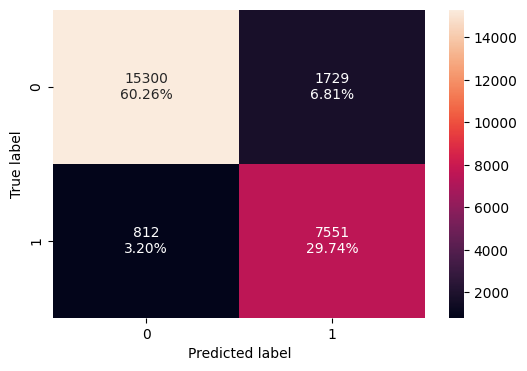

In [ ]:
# Checking performance of best model on training set:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Check the f1 score and other metric performances of the best model:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train


Accuracy  Recall  Precision      F1
0   0.89993 0.90291    0.81369 0.85598

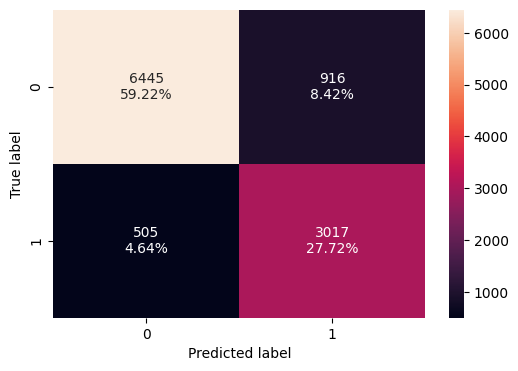

In [ ]:
# Check the performance of best model on test set:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
# Check the F1 score and other performance metrics of the best model on the test set:
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.86943 0.85662    0.76710 0.80939

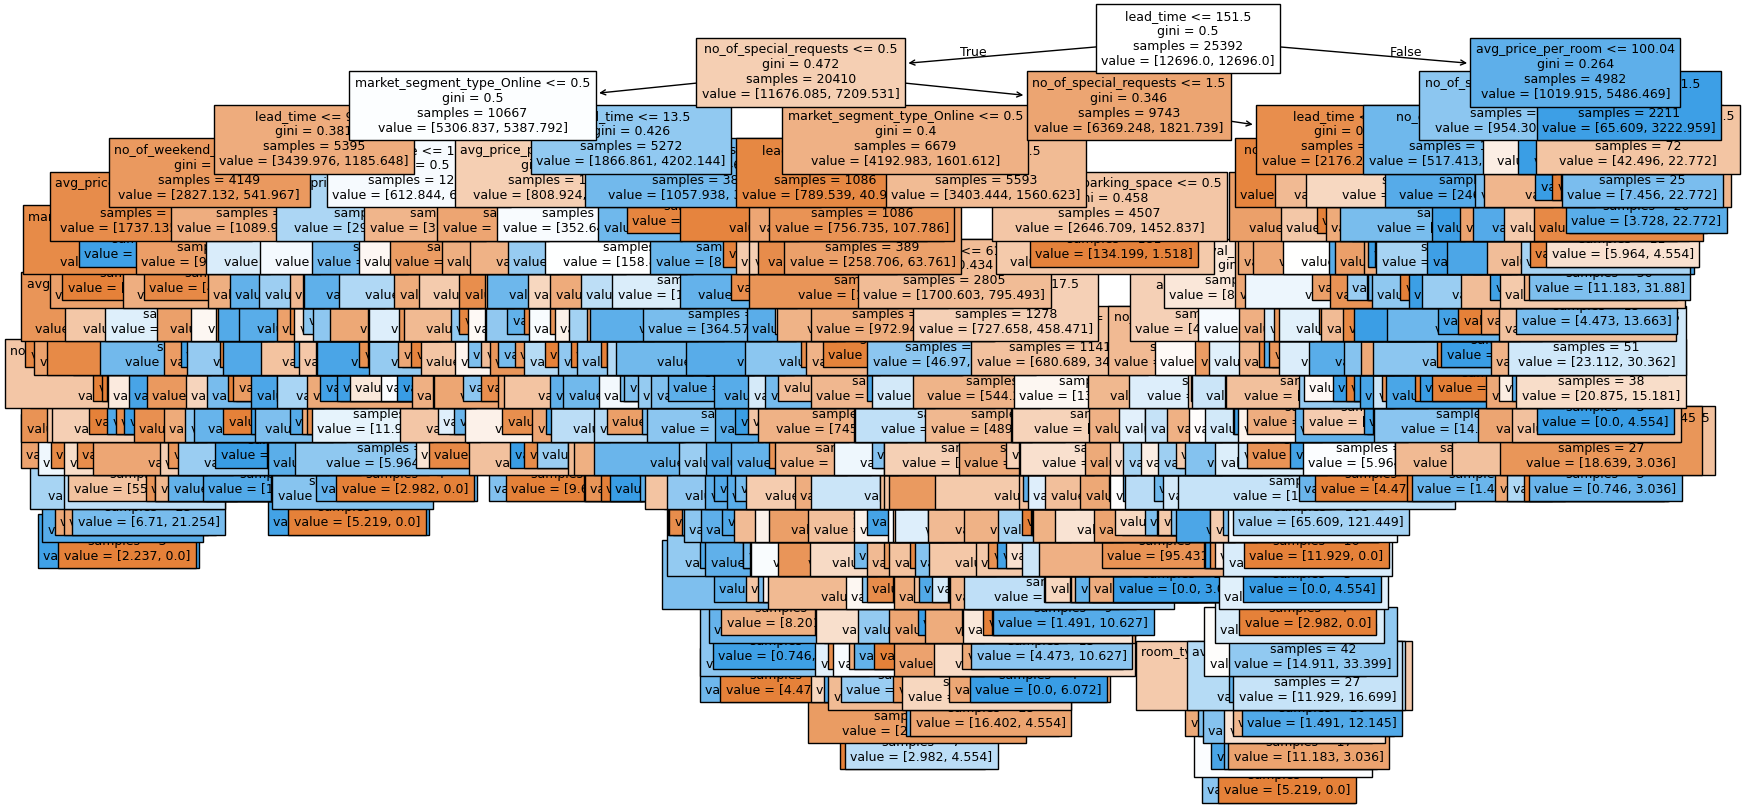

In [ ]:
# Plot the outline of the best model:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of the best model decision tree:
print(tree.export_text(best_model, feature_names = feature_names, show_weights = True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

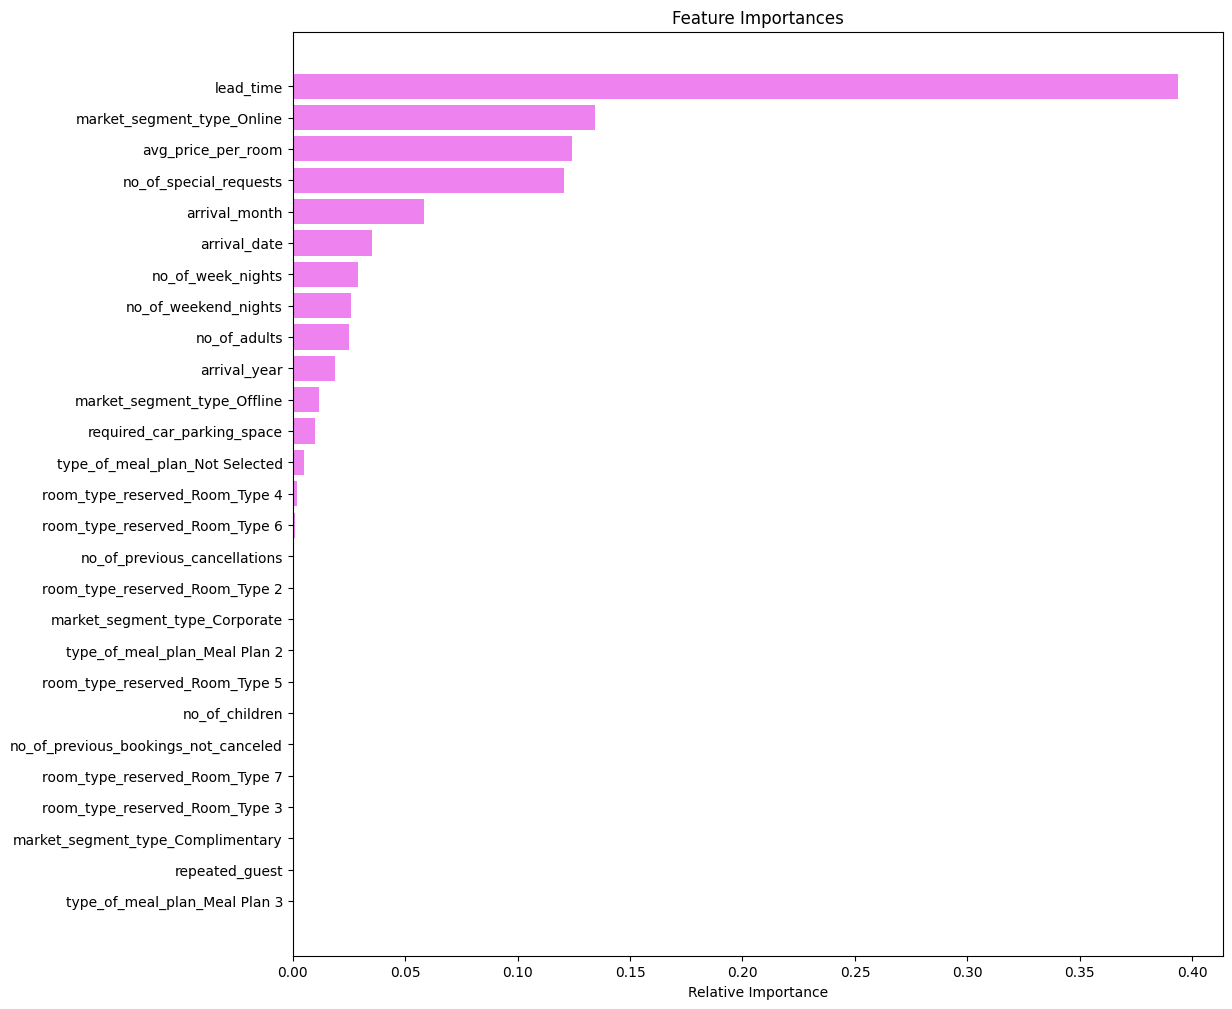

In [ ]:
# importance of features in the best model decision tree:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing Decision Tree Models:

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_perf_train_tuned.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89993  
Recall                          0.90291  
Precision                       0.81369  
F1                              0.85598

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_perf_test_tuned.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79461                      0.72758   
F1                       0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86943  
Recall                          0.85662  
Precision                       0.76710  
F1                              0.80939

Observation:

The Post pruned tree utilizing the optimal ccp_alpha pruning parameter value provides the highest F1 score, ensuring the lowest number of possible false positives and false negatives will occur in terms of booking cancellations.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?

We found the most important factor leading to cancellation is lead time of the booking.  The longer out the booking is, the higher the chance of cancellation. We recommend a refund policy for those cancellations, since these rooms get rebooked without a problem.

A non-refund policy is needed to address late cancellations that take place during times of peak demand, when the average price per room is comparitively high.  We found this combination of factors occur during the summer months, and in particular in July, when cancellations reach a staggering 45% of all bookings that month.  


- What other recommendations would you suggest to the hotel?

Other observations that stood out was that repeat customers have an extremely low rate of cancelling reservations. Combined with the observation that the hotel draws a relative low number of families, and the underutilization of rooms during the weekend, leads us to recommend a new marketing campaign that would entice guests with incentives to come back with their families on weekends, or a combination of weeknight and weekend.  